**Задача** состоит в том, чтобы создать алгоритмы для определения вероятности принадлежности объектов к каждой из 14 рассматриваемых категорий. **Цель** состоит в том, чтобы использовать данные предсказания на пользу, прибыльность бизнеса.

Для оценки качества полученного результата будет использоваться **метрика LogLoss**. 
<br>По каждой из 14 категорий метрика считается независимо, затем берется среднее арифметическое значений метрик, полученных для категорий.

Задача обучения с учителем (**supervised learning**).

---

## Exploratory data analysis: part I

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
train = pd.read_csv(r'.\Data\problem_train.csv')
test = pd.read_csv(r'.\Data\problem_test.csv')

labels = pd.read_csv(r'.\Data\problem_labels.csv')

In [3]:
bold('**Shape of our train, test & labels data:**')
display(train.shape, test.shape, labels.shape)

**Shape of our train, test & labels data:**

(8000, 1379)

(2000, 1379)

(8000, 15)

In [4]:
bold('**Train data information:**')
display(train.info())

**Train data information:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 1379 entries, id to c_1377
dtypes: float64(345), int64(9), object(1025)
memory usage: 84.2+ MB


None

In [5]:
bold('**Train columns:**')
display(list(train.columns)[:15] + list(train.columns)[-5:])

**Train columns:**

['id',
 'release',
 'n_0000',
 'n_0001',
 'n_0002',
 'n_0003',
 'n_0004',
 'n_0005',
 'n_0006',
 'n_0007',
 'n_0008',
 'n_0009',
 'n_0010',
 'n_0011',
 'n_0012',
 'c_1373',
 'c_1374',
 'c_1375',
 'c_1376',
 'c_1377']

In [6]:
bold('**Test data information:**')
display(test.info())

**Test data information:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 1379 entries, id to c_1377
dtypes: float64(457), int64(9), object(913)
memory usage: 21.0+ MB


None

In [7]:
bold('**Test columns:**')
display(list(test.columns)[:15] + list(test.columns)[-5:])

**Test columns:**

['id',
 'release',
 'n_0000',
 'n_0001',
 'n_0002',
 'n_0003',
 'n_0004',
 'n_0005',
 'n_0006',
 'n_0007',
 'n_0008',
 'n_0009',
 'n_0010',
 'n_0011',
 'n_0012',
 'c_1373',
 'c_1374',
 'c_1375',
 'c_1376',
 'c_1377']

In [8]:
bold('**Labels data information:**')
display(labels.info())

**Labels data information:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         8000 non-null   int64
 1   service_a  8000 non-null   int64
 2   service_b  8000 non-null   int64
 3   service_c  8000 non-null   int64
 4   service_d  8000 non-null   int64
 5   service_e  8000 non-null   int64
 6   service_f  8000 non-null   int64
 7   service_g  8000 non-null   int64
 8   service_h  8000 non-null   int64
 9   service_i  8000 non-null   int64
 10  service_j  8000 non-null   int64
 11  service_k  8000 non-null   int64
 12  service_l  8000 non-null   int64
 13  service_m  8000 non-null   int64
 14  service_n  8000 non-null   int64
dtypes: int64(15)
memory usage: 937.6 KB


None

In [8]:
train_cols = list(train.columns)
test_cols = list(test.columns)

print('Unique cols in train:', list(set(train_cols) - set(test_cols)))
print('Unique cols in test:', list(set(test_cols) - set(train_cols)))

Unique cols in train: []
Unique cols in test: []


In [9]:
train_noNas = list(train.iloc[:, list(train.isnull().any() == False)].columns)

bold("**Columns with no missing values in train data:**")
display(
    len(train_noNas),
    train_noNas
)

**Columns with no missing values in train data:**

32

['id',
 'release',
 'n_0047',
 'n_0050',
 'n_0052',
 'n_0061',
 'n_0067',
 'n_0075',
 'n_0078',
 'n_0091',
 'n_0108',
 'n_0109',
 'o_0176',
 'o_0264',
 'c_0466',
 'c_0500',
 'c_0638',
 'c_0699',
 'c_0738',
 'c_0761',
 'c_0770',
 'c_0838',
 'c_0870',
 'c_0980',
 'c_1145',
 'c_1158',
 'c_1189',
 'c_1223',
 'c_1227',
 'c_1244',
 'c_1259',
 'c_1348']

In [11]:
bold("**Columns with gaps in train data:**")
display(
    train.isna().any().sum(),
    round(train.isna().any().mean() * 100, 2)
)

**Columns with gaps in train data:**

1347

97.68

Из 1347 (97.68%) столбцов 1379 имеют пропущенные данные.

In [12]:
bold("**Mean percentage of missing values among train columns with NaNs:**")
display(
        (train.isnull().sum() / len(train) * 100).mean(),
        np.median(np.array((train.isnull().sum() / len(train) * 100)))
)

**Mean percentage of missing values among train columns with NaNs:**

82.65881073241479

97.46249999999999

Интересно получается: 8000 объектов, а релевантные из них только 200. Занятно. А еще 14 классов предсказать.
<br>//не совсем 200, не правильно на эмоциях сказал..

In [10]:
train_nas = train.iloc[:, list(train.isnull().sum() / len(train) * 100 == 100)].columns
print(train_nas, '\n', len(train_nas), sep='')

Index(['n_0101', 'o_0224', 'o_0257', 'o_0308', 'c_0491', 'c_0529', 'c_0541',
       'c_0596', 'c_0632', 'c_0644', 'c_0693', 'c_0708', 'c_0710', 'c_0763',
       'c_0784', 'c_0803', 'c_0848', 'c_0902', 'c_0959', 'c_1009', 'c_1072',
       'c_1129', 'c_1148', 'c_1168', 'c_1230', 'c_1257', 'c_1277', 'c_1281',
       'c_1308', 'c_1332'],
      dtype='object')
30


In [11]:
test_noNas = list(test.iloc[:, list(test.isnull().any() == False)].columns)

bold("**Columns with no missing values in test data:**")
display(
    len(test_noNas),
    test_noNas
)

**Columns with no missing values in test data:**

34

['id',
 'release',
 'n_0047',
 'n_0050',
 'n_0052',
 'n_0061',
 'n_0067',
 'n_0075',
 'n_0078',
 'n_0091',
 'n_0108',
 'n_0109',
 'o_0176',
 'o_0264',
 'c_0368',
 'c_0466',
 'c_0500',
 'c_0638',
 'c_0699',
 'c_0738',
 'c_0761',
 'c_0770',
 'c_0838',
 'c_0870',
 'c_0980',
 'c_0996',
 'c_1004',
 'c_1145',
 'c_1158',
 'c_1189',
 'c_1223',
 'c_1227',
 'c_1244',
 'c_1259']

Распределение не совпадает с train'ом.

In [12]:
bold("**Columns with gaps in test data:**")
display(
    test.isna().any().sum(),
    round(test.isna().any().mean() * 100, 2)
)

**Columns with gaps in test data:**

1345

97.53

Проценты тут тоже немного отличаются. Но кажется, что не существенно.
<br>Но все равно стоит помнить о возможности переобучиться.

In [13]:
bold("**Mean percentage of missing values among test columns with NaNs:**")
display(
        (test.isnull().sum() / len(test) * 100).mean(),
        np.median(np.array((test.isnull().sum() / len(test) * 100)))
)

**Mean percentage of missing values among test columns with NaNs:**

82.38531544597535

97.3

Есть ли полностью NA'шные стобцы?

In [14]:
test_nas = test.iloc[:, list(test.isnull().sum() / len(test) * 100 == 100)].columns
print(test_nas, '\n', len(test_nas), sep='')

Index(['n_0008', 'n_0011', 'n_0055', 'n_0101', 'n_0111', 'o_0117', 'o_0121',
       'o_0122', 'o_0126', 'o_0149',
       ...
       'c_1288', 'c_1292', 'c_1308', 'c_1312', 'c_1332', 'c_1334', 'c_1349',
       'c_1360', 'c_1368', 'c_1371'],
      dtype='object', length=179)
179


In [15]:
len(train_nas) == len(test_nas)

False

А вот тут уже распределение полностью NA'шных столбцов значительно отличается. Вот об этом точно придется позаботиться.

In [19]:
bold("**Columns, where no NAs in both train and test data:**")
display(
    len(list(set(train_noNas) & set(test_noNas))),
    list(set(train_noNas) & set(test_noNas))
)

**Columns, where no NAs in both train and test data:**

31

['n_0047',
 'c_0638',
 'n_0052',
 'o_0176',
 'c_0980',
 'c_0466',
 'n_0075',
 'n_0061',
 'n_0109',
 'release',
 'c_0770',
 'c_1227',
 'c_1223',
 'c_0500',
 'c_1145',
 'n_0108',
 'c_0761',
 'c_0699',
 'c_1189',
 'c_1158',
 'o_0264',
 'id',
 'n_0050',
 'n_0091',
 'n_0067',
 'c_1244',
 'n_0078',
 'c_1259',
 'c_0738',
 'c_0870',
 'c_0838']

In [20]:
bold("**Columns, where only NAs in both train and test data:**")
display(
    len(list(set(train_nas) & set(test_nas))),
    list(set(train_nas) & set(test_nas))
)

**Columns, where only NAs in both train and test data:**

25

['n_0101',
 'c_1281',
 'c_0784',
 'c_1257',
 'c_0708',
 'c_1277',
 'c_0763',
 'c_0848',
 'c_0693',
 'c_1332',
 'c_1230',
 'c_0959',
 'c_0632',
 'c_0491',
 'c_1308',
 'c_0529',
 'c_0596',
 'c_0541',
 'c_0710',
 'c_1009',
 'c_1168',
 'c_0902',
 'c_1148',
 'c_0803',
 'c_1129']

In [21]:
flag = len(list(train['id'].values) + list(test['id'].values)) - len(set(list(train['id'].values) + list(test['id'].values)))

bold("**The number of duplicates in the test 'id' column that are in the train 'id' column:**")
display(
    flag
)

**The number of duplicates in the test 'id' column that are in the train 'id' column:**

0

In [22]:
train.head(7)

id release  n_0000  n_0001    n_0002  n_0003  n_0004    n_0005  n_0006  \
0  11193       a     NaN     NaN  0.025449     NaN     NaN  0.368421     NaN   
1  11382       a     NaN     NaN  0.031297     NaN     NaN  0.315789     NaN   
2  16531       a     NaN     NaN  0.024475     NaN     NaN  0.342105     NaN   
3   1896       a     NaN     NaN  0.041694     NaN     NaN  0.447368     NaN   
4  18262       c     NaN     NaN  0.038120     NaN     NaN  0.315789     NaN   
5  10540       b     NaN     NaN  0.039420     NaN     NaN  0.368421     NaN   
6   5244       c     NaN     NaN  0.050141     NaN     NaN  0.394737     0.2   

   n_0007  ...  c_1368  c_1369  c_1370  c_1371  c_1372  c_1373  c_1374  \
0     NaN  ...     NaN     NaN     NaN     NaN       a     NaN       q   
1     NaN  ...     NaN     NaN       a     NaN       a     NaN     NaN   
2     NaN  ...     NaN     NaN       a     NaN       a     NaN       b   
3     NaN  ...     NaN     NaN     NaN     NaN       a     NaN     NaN   
4     NaN  ...     NaN     NaN       b     NaN       a     NaN       a   
5     NaN  ...     NaN     NaN     NaN     NaN       a     NaN     NaN   
6     NaN  ...     NaN     NaN     NaN     NaN       a     NaN     NaN   

   c_1375  c_1376  c_1377  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  
5     NaN     NaN     NaN  
6     NaN     NaN     NaN  

[7 rows x 1379 columns]

In [23]:
labels.head(7)

id  service_a  service_b  service_c  service_d  service_e  service_f  \
0  11193          1          1          0          0          0          0   
1  11382          0          0          0          0          0          0   
2  16531          0          0          0          0          0          0   
3   1896          0          0          0          1          0          0   
4  18262          0          0          0          1          1          0   
5  10540          1          1          1          0          0          0   
6   5244          0          0          0          0          0          0   

   service_g  service_h  service_i  service_j  service_k  service_l  \
0          0          0          0          1          1          0   
1          0          0          0          1          1          0   
2          0          0          0          1          1          0   
3          0          0          0          1          0          1   
4          0          0          0          0          1          1   
5          0          1          1          1          0          0   
6          0          0          0          1          1          0   

   service_m  service_n  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          1          0  
5          0          0  
6          0          1

In [24]:
test.head(7)

id release  n_0000    n_0001    n_0002  n_0003  n_0004    n_0005  \
0   7957       a     NaN       NaN  0.029890     NaN     NaN  0.368421   
1    693       c     NaN  0.452381  0.032164     NaN     NaN  0.421053   
2  15558       c     NaN  0.547619  0.049166     NaN     NaN  0.500000   
3  15614       a     NaN       NaN  0.048733     NaN     NaN  0.394737   
4   8149       b     NaN       NaN  0.049924     NaN     NaN  0.368421   
5    711       b     NaN       NaN  0.022525     NaN     NaN  0.368421   
6  12177       a     NaN       NaN  0.051874     NaN     NaN  0.368421   

   n_0006  n_0007  ...  c_1368  c_1369  c_1370  c_1371  c_1372  c_1373  \
0     NaN     NaN  ...     NaN     NaN     NaN     NaN       a     NaN   
1     0.0     NaN  ...     NaN     NaN     NaN     NaN       a     NaN   
2     0.2     NaN  ...     NaN     NaN     NaN     NaN       a       e   
3     NaN     NaN  ...     NaN     NaN     NaN     NaN       b     NaN   
4     NaN     NaN  ...     NaN     NaN     NaN     NaN       a     NaN   
5     NaN     NaN  ...     NaN     NaN     NaN     NaN       a     NaN   
6     NaN     NaN  ...     NaN     NaN     NaN     NaN       a     NaN   

   c_1374  c_1375  c_1376  c_1377  
0       q     NaN     NaN     NaN  
1       x     NaN     NaN     NaN  
2       b     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN       b  
5     NaN     NaN     NaN     NaN  
6       q     NaN     NaN       a  

[7 rows x 1379 columns]

- Нужно ли вообще избавиться от полностью NA'шных колонок и в train, и в test (одновременно)?
- Нужно ли вообще избавиться от полностью NA'шных колонок?
- Если не NA'шек очень мало, стоит ли это пытаться зафилливать или лучше избавиться?


- Проверить, что если оставить только full no NAs столбцы


- Мб зафилливать, например, категориальные столбцы и не нужно, а лишь использовать векторное кодирование (где NA = 0, где буквы - какие-то не нулевые значения в векторе)?
- Вообще, SVD есть и вот это все дело с понижением размерности / низкоранговым приближением

---

## Exploratory data analysis: part II

In [25]:
bold("**How many labels are there on average per object?:**")
display(
    round(labels.iloc[:, 1:].sum(axis=1).mean(), 2)
)

**How many labels are there on average per object?:**

3.53

Посмотрим на соотношение классов:

In [26]:
bold("**The ratio of classes in the train data:**")
display(
    round(labels.iloc[:, 1:].sum() / labels.shape[0] * 100, 2)
)

**The ratio of classes in the train data:**

service_a    47.21
service_b    32.82
service_c    26.16
service_d     1.70
service_e     5.39
service_f     2.91
service_g     5.19
service_h    29.70
service_i     1.61
service_j    84.82
service_k    78.20
service_l    10.80
service_m     8.86
service_n    17.80
dtype: float64

Похоже, задача еще с явным дисбалансом классов, раз service_j >> service_d.

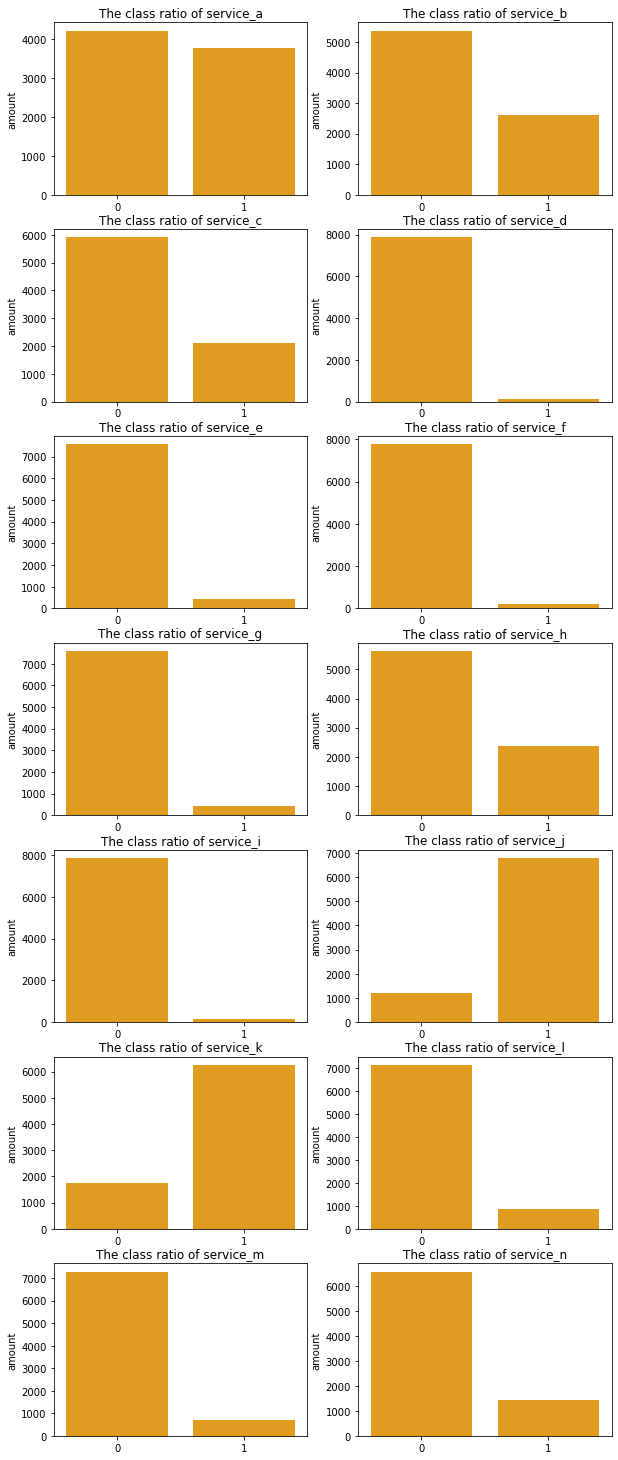

In [27]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,26))

iters = [i for i, j in zip([i for i in range(0, 7)], [2 for i in range(0, 7)]) for k in range(j)]
for col, i in zip(labels.iloc[:, 1:].columns, range(0, len(labels))):
    sns.countplot(x=col, 
                  data=labels, 
                  color='Orange',
                  ax=ax[iters[i]][i % 2])
    
    ax[iters[i]][i % 2].set_xlabel("")
    ax[iters[i]][i % 2].set_ylabel("amount")
    ax[iters[i]][i % 2].set_title('The class ratio of ' + col)

Попробуем посмотреть на распределение меток в зависимости от сервиса:

In [16]:
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA, TruncatedSVD

In [17]:
noNAs = list(set(train_noNas) & set(test_noNas))
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(train[noNAs].select_dtypes(include=numerics).values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))


# TruncatedSVD Implementation
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(train[noNAs].select_dtypes(include=numerics).values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

PCA took 0.071 s
Truncated SVD took 0.009 s


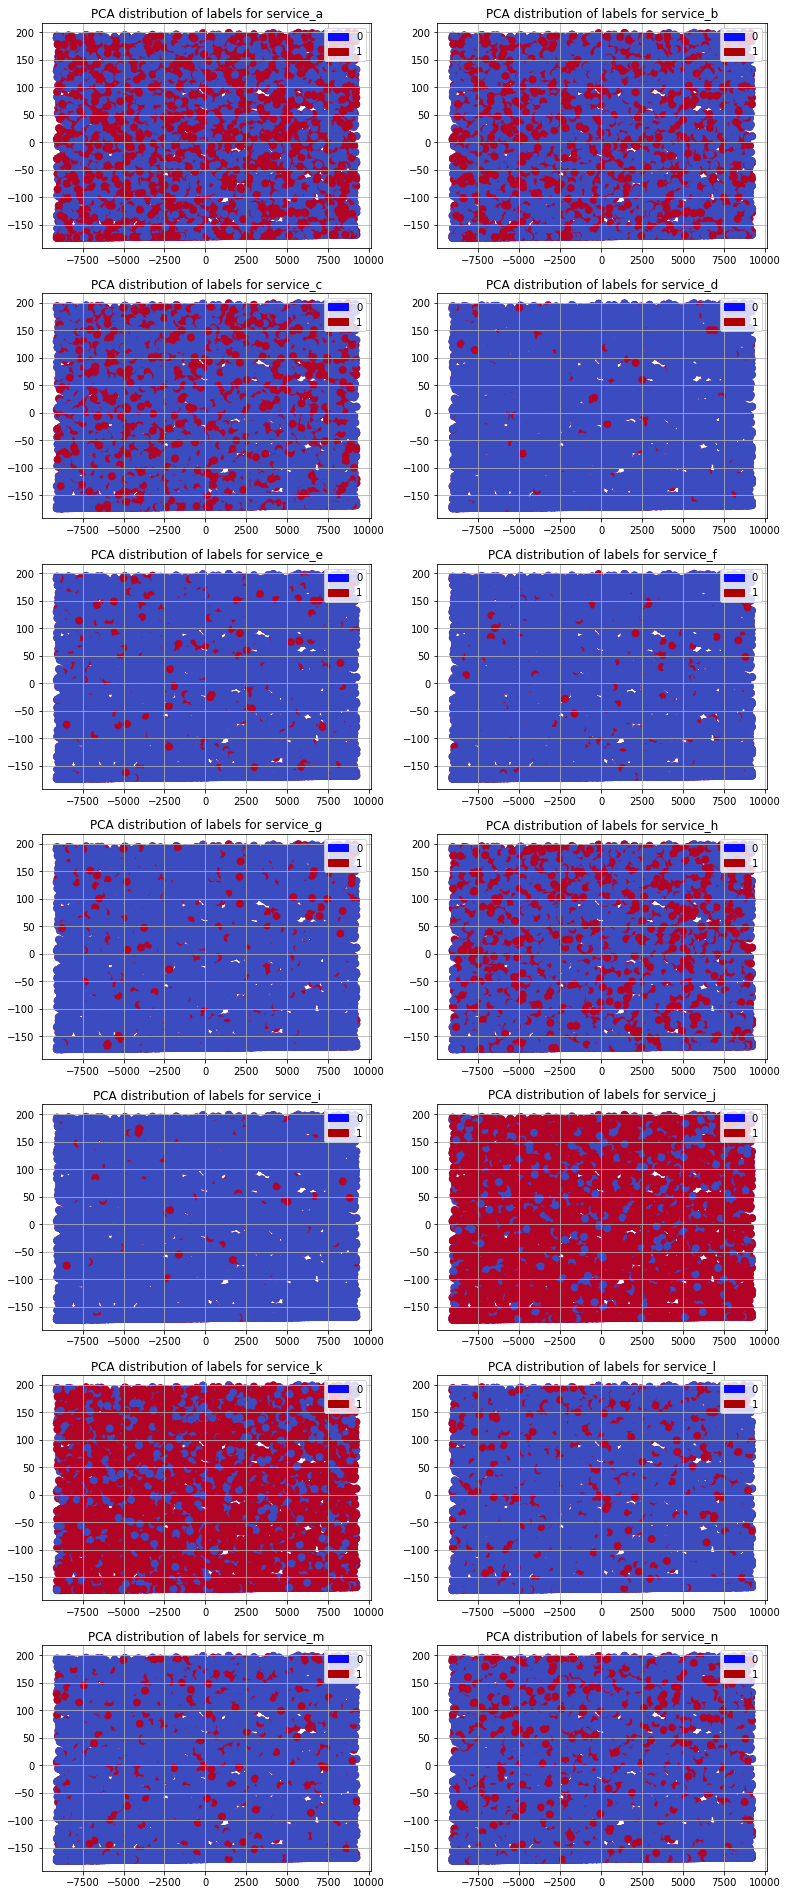

In [30]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(13,34))

iters = [i for i, j in zip([i for i in range(0, 7)], [2 for i in range(0, 7)]) for k in range(j)]
for col, i in zip(labels.iloc[:, 1:].columns, range(0, len(labels))):
    
    blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
    red_patch = mpatches.Patch(color='#AF0000', label='1')
    
    ax[iters[i]][i % 2].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(labels[col] == 0), cmap='coolwarm', label='0', linewidths=2)
    ax[iters[i]][i % 2].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(labels[col] == 1), cmap='coolwarm', label='1', linewidths=2)

    ax[iters[i]][i % 2].set_xlabel("")
    ax[iters[i]][i % 2].set_ylabel("")
    ax[iters[i]][i % 2].set_title('PCA distribution of labels for ' + col)
    ax[iters[i]][i % 2].grid(True)
    ax[iters[i]][i % 2].legend(handles=[blue_patch, red_patch])

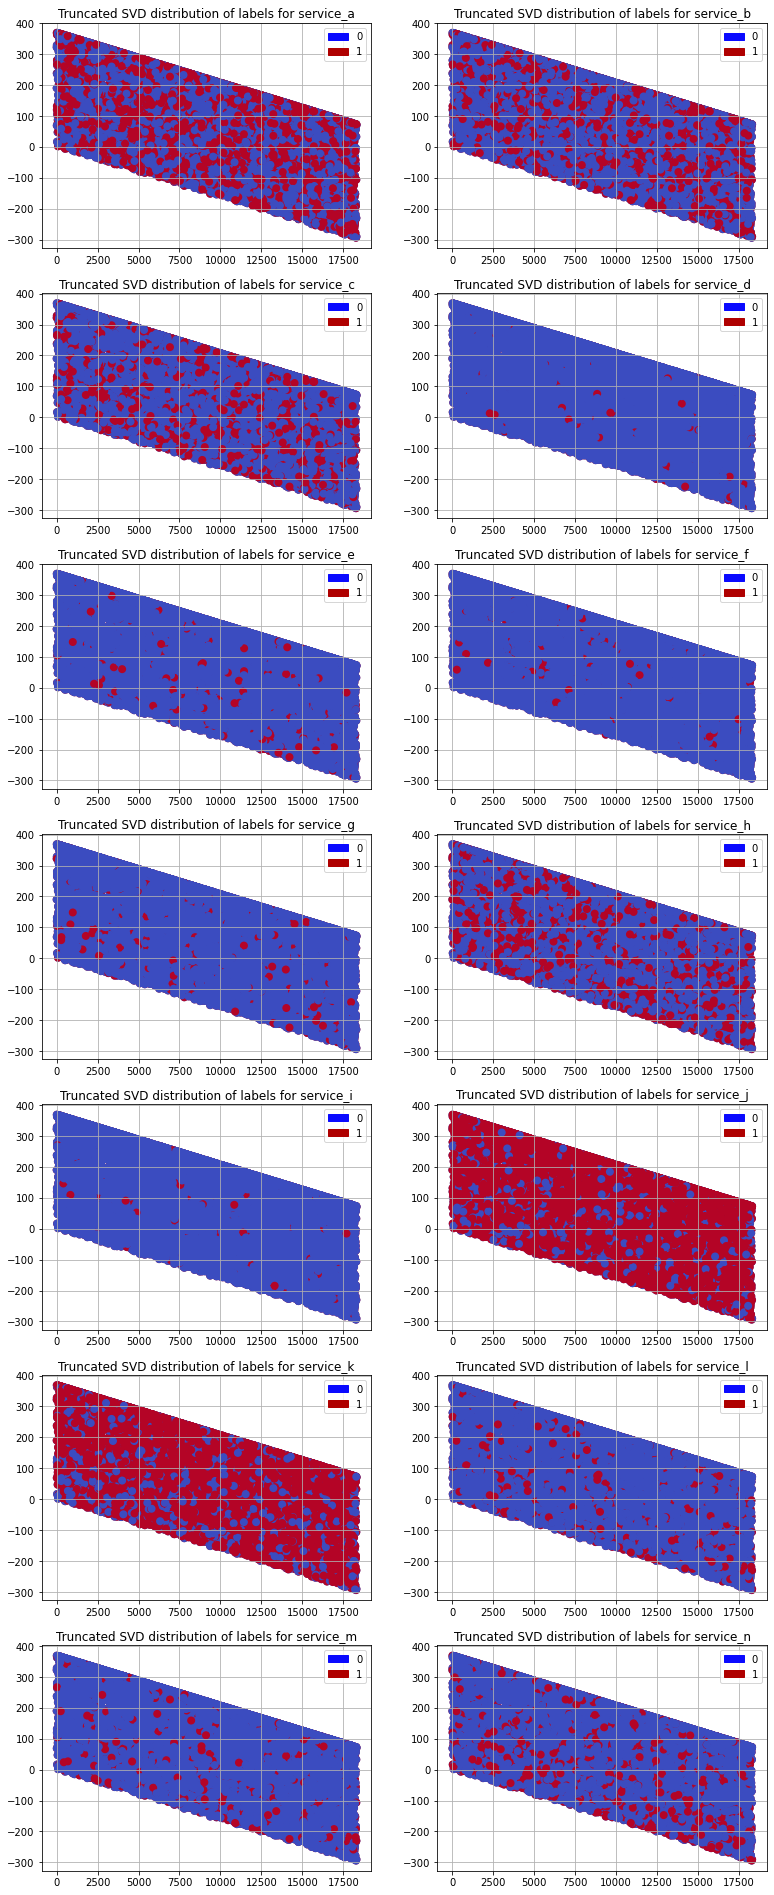

In [31]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(13,34))

iters = [i for i, j in zip([i for i in range(0, 7)], [2 for i in range(0, 7)]) for k in range(j)]
for col, i in zip(labels.iloc[:, 1:].columns, range(0, len(labels))):
    
    blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
    red_patch = mpatches.Patch(color='#AF0000', label='1')
    
    ax[iters[i]][i % 2].scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(labels[col] == 0), cmap='coolwarm', label='0', linewidths=2)
    ax[iters[i]][i % 2].scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(labels[col] == 1), cmap='coolwarm', label='1', linewidths=2)

    ax[iters[i]][i % 2].set_xlabel("")
    ax[iters[i]][i % 2].set_ylabel("")
    ax[iters[i]][i % 2].set_title('Truncated SVD distribution of labels for ' + col)
    ax[iters[i]][i % 2].grid(True)
    ax[iters[i]][i % 2].legend(handles=[blue_patch, red_patch])

Да, сами по себе разложение на только no NAs какие-то useless, и только no NAs не будет иметь смысла использовать.
<br>Единственное, что кажется, что метки более-менее равномерно могут быть распределены на объектах.

---

## Metric understanding

### Binary LogLoss

Рассмотрим задачу бинарной классификации. Пусть на объектах нашей обучающей выборки $X$ имеется распределение на ответах $Y$: $p(y = +1|x)$. Хотим, чтобы алгоритм $b(x)$ возвращал число из отрезка $[0; 1]$. Наша задача - выбрать для него такую процедуру обучения, что в точке $x$ ему будет оптимально выдавать число $p(y = +1|x)$. Если в выборке $X$ объект $x$ встречается $n$ раз с ответами $\{y_1, y_2, \ldots, y_n\}$, то получаем следующее требование: 
$${arg\,min}_{b \in {\rm I\!R}} \ \frac{1}{n}\sum\limits_{i=1}^{n} L(y_i, b) \approx p(y = +1 | x)$$
При стремплении n к бесконечности получим, что функционал стремится к мат ожиданию ошибки:
$${arg\,min}_{b \in {\rm I\!R}} \ {\rm I\!E}(L(y, b) | x) = p(y = +1 | x)$$

<br>Если алгоритм действительно выдает вероятности, то они должны согласовываться с выборкой. С точки зрения алгоритма вероятность того, что в выборке встретится объект $x_i$ с классом $y_i$ равна $b(x_i)^{[y_i = +1]} (1 - b(x_i))^{[y_i = -1]}$. Исходя из этого, можно записать правдоподобие выборки (т.е. вероятность получить такую выборку с точки зрения алгоритма):
$$Q(a, X) = \prod\limits_{i=1}^{l} b(x_i)^{[y_i = +1]} (1 - b(x_i))^{[y_i = -1]}$$
Логарифм данного правдоподобия удобнее использовать как функционал для обучения алгоритма:
$$- \sum\limits_{i=1}^{l} ([y_i = +1] \log b(x_i) + [y_i = -1] \log (1 - b(x_i))) \ \rightarrow \ min$$
Получили **логарифмическую функцию потерь** для задачи бинарной классификации.

<br>Покажем, что она позволяет корректно предсказывать вероятности. Запишем мат ожиданием функции потерь в точке $x$:
$${\rm I\!E}\left[L(y, b) \ | \ x\right) = {\rm I\!E}\left[ -[y = +1] \log b - [y = -1] \log (1 - b) \ | \ x \right] = \\ 
-p(y = +1 \ | \ x) \log b - (1 - p(y = +1 \ | \ x))\log (1 - b)$$
Дифференцируя по b:
$$-\frac{p(y = +1 \ | \ x)}{b} + \frac{1 - p(y = +1 \ | \ x)}{1-b} = 0$$
Получаем потимальный ответ алгоритма:
$$b_* = p(y = +1 \ | \ x)$$

<br>---
<br>Заметим, что также полученное здесь выражение 
$$ -p(y = +1 \ | \ x) \log b - (1 - p(y = +1 \ | \ x))\log (1 - b) \quad \leftrightarrow  \quad -p \log p - (1 - p) \log (1 - p)$$
есть *энтропия*. А это объясняет, почему при построении решающих деревьев в задачах классификации используется как раз энтропийный критерий: оценка принадлежности к классу 1 часто производится с помощью среднего арифметического меток в листе. Для конкретного дерева эта вероятность будет одинакова для всех объектов в листе, т.е. константой. Получается, что энтропия в листе примерно равна logloss ошибке константного решения.
<br>---

<br>Везде выше требовалось, чтобы алгоритм $b(x)$ возвращал числа из $[0; 1]$. Этого легко достичь, если положить $b(x) = \sigma (\langle w, x\rangle)$, где в качестве $\sigma$ подойдет любая монотоннно неубывающая функция с областью значений $[0; 1]$. Например $\sigma (z) = \frac{1}{1 + \exp(-z)}$. Чем больше скалярное произведение $\langle w, x \rangle$, тем больше будет предсказанная вероятность.

<br>Интерпретация данного скалярного выражения:
$$p(y = +1 \ | \ x) = \frac{1}{1 - \exp (-\langle w, x \rangle )} \quad \rightarrow \quad \langle w, x \rangle = \log \frac{p(y = +1 \ | \ x)}{p(y = -1 \ | \ x)}$$
Подставим трансформированный ответ линейной модели в логарифмическую функцию (logloss) потерь:
$$- \sum\limits_{i=1}^{l} \left( [y_i = +1] \log \frac{1}{1 + \exp (-\langle w, x_i \rangle )} + [y_i = -1] \log \frac{\exp (-\langle w, x_i \rangle )}{1 + \exp (-\langle w, x_i \rangle )}\right) = \\ 
\sum\limits_{i=1}^{l} \log (1 + \exp (-y_i \langle w, x_i \rangle))$$
Полученная функция в точности представляет собой **логистические потери**, упомянутые ранее. Такая линейная модель классификации, настроенная путем минимизации данного функционала, оптимизирует правдоподобие выборки и дает корректные *оценки* вероятности принадлежности к положительному классу.

<br>Само по себе выражение $y_i \langle w, x_i \rangle$ – это своего рода "уверенность" модели в классификации объекта $x_i$:
* если отступ большой (по модулю) и положительный, это значит, что метка класса поставлена правильно, а объект находится далеко от разделяющей гиперплоскости (такой объект классифицируется уверенно);
* если отступ большой (по модулю) и отрицательный, значит метка класса поставлена неправильно, а объект находится далеко от разделяющей гиперплоскости (скорее всего такой объект – аномалия, например, его метка в обучающей выборке поставлена неправильно);
* если отступ малый (по модулю), то объект находится близко к разделяющей гиперплоскости, а знак отступа определяет, правильно ли объект классифицирован.

<br>Также заметим, что в случае полностью рандомизированного алгоритма ($p = \frac{1}{2}$), выдающего метки чисто случайным образом, получим следующий logloss:
$$-\frac{1}{2} \log \frac{1}{2} - (1 - \frac{1}{2}) \log (1 - \frac{1}{2}) \approx 0.693$$

### Multiclass LogLoss

Теперь перейдем к задаче нашего типа - мультиклассикации. LogLoss обобщается на эту задачу вполне естественным образом:
$$ logloss = - \frac{1}{l} \sum\limits_{i=1}^{l} \sum\limits_{j=1}^{K} y_{ij} \log a_{ij} $$
$l$ – число элементов в выборке, $K$ – число классов, $a_{ij}$ – ответ (вероятность) алгоритма на $i$-м объекте на вопрос принадлежности его к $j$-му классу, $y_{ij}=1$ если $i$-й объект принадлежит $j$-му классу, в противном случае $y_{ij}=0$.

Т.е. по каждому из K классов метрика считается независимо, затем берется среднее арифметическое ~~значений метрик, полученных для классов~~ по всем объектам из выборки.

<br>На самом деле, формулу можно дописать в несколько других обозначениях:
$$- \frac{1}{l} \sum\limits_{i=1}^{l} \sum\limits_{j=1}^{K} y_{ij} \log a_{ij} \ = \
 \sum\limits_{j=1}^{K} \left( - \frac{1}{l} \sum\limits_{i=1}^{l} y_{ij} \log a_{ij} \right) \ = \ \sum\limits_{j=1}^{K} F_j$$
Наша функция как бы "стоимости" $logloss$ измеряет расстояние между двумя распределениями вероятностей, т. е. насколько схоже распределение фактических меток и вероятностей классификатора. Следовательно, предпочтительны значения, близкие к нулю.

<br>Идеально правильный классификатор (с вероятностью 1) будет иметь нулевой logloss, что является предпочтительным случаем.

Давайте рассмотрим классификатор, назначающий метки класса совершенно случайным образом (уже выяснили, что при бинарной классификации $logloss \approx 0.693$). Вероятость отнесения к правильному классу есть $\frac{1}{K}$. Следовательно, $logloss = - \log (\frac{1}{K}) = \log K$. Не зависит от класса.
<br>Logloss для индивидуального наблюдения может быть сравнен с этим значением, чтобы проверить, насколько хорошо классификатор работает в отношении случайной классификации. Однако в этом нет особого смысла. Рассмотрим пример.

Рассмотрим преуспевающий, успешный классификатор, который все же допустил неправильную классификацию на объекте. Предположим, что истинный класс объекта есть 'A' и что выданная вероятность очень близка к 0 для данного класса 'A'. Тогда частный (на данном объекте), как и весь logloss будет равен $\infty$. Это происходит не так уж и редко, на самом деле. Поэтому такие классификация обычно игнорируются, т.к. данный объект может являться, например, выбросом (тогда его просто стоит удалить из нашего пространства и перезапустить классификатор).

---

In [18]:
import scipy as sp
from sklearn.metrics import log_loss

In [19]:
def logloss_multi(actual, predicted):
    
    epsilon = 1e-15
    predicted = sp.maximum(epsilon, predicted)
    predicted = sp.minimum(1-epsilon, predicted)
    
    llm = -1.0 * sum(
        np.einsum(
            'ij,ij->i', 
            actual, 
            np.log(predicted)
        )
    ) / actual.shape[0]
    
    return llm

In [29]:
actual_our = np.matrix([[1, 0],
                        [0, 1]])
predicted_our = np.matrix([[0.5, 0.5],
                           [.5, .5]])

actual_skl = np.matrix([0, 1])
predicted_skl = np.matrix([0.5, 0.5])

print(logloss_multi(actual_our, predicted_our))
print(log_loss(actual_skl, predicted_skl))

0.6931471805599453
0.6931471805599453


Как минимум для бинарной классификации наша функция-метрика работает.

Проблема в том, что все библиотечные алгоритмы работают с 1d-array'ми, т.е. с непересекающимися мультиклассами: один объект принимает только один из K классов. Поэтому я буду использовать библиотечные алгоритмы, делать предсказания отдельно для каждого из 14 классов, а потом брать среднее арифметическое logloss'ов по 14 классам.

---

## Baseline models

Обучим в качестве baseline моделей, собственно, все основные алгоритмы (и их основные разновидности).

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

Удалим столбец ```id```, как учили деды.

In [21]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)
labels = labels.drop('id', axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, 
                                                    test_size=0.25, random_state=43)

Сначала попробуем из коробки, а потом на кросс-валидации.

In [23]:
train_noNas = list(train.iloc[:, list(train.isnull().any() == False)].columns)
test_noNas = list(test.iloc[:, list(test.isnull().any() == False)].columns)
noNAs = list(set(train_noNas) & set(test_noNas))

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [34]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

svc = SVC(
    kernel='sigmoid',
    probability=True,
    random_state=42
)

# Данные нужно нормализовать, но они тут на глаз (да, не хорошо) все на [0, 1]
knnc = KNeighborsClassifier(
    n_neighbors=6,    ## В среднем у нас объект всего к чуть больше, чем 3м классам принадлежит
    radius=0.25,
    n_jobs=-1
)

lgbmc = LGBMClassifier()

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'SVC': svc,
    'kNNC': knnc,
    'LGBM': lgbmc,
    'CB': cbc
}
predicts = []

In [35]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        model.fit(X_train[noNAs].select_dtypes(include=numerics), y_train.iloc[:, K])
        y_pred = model.predict_proba(X_test[noNAs].select_dtypes(include=numerics))[:, 1]
            
        predicts.append(log_loss(y_test.iloc[:, K], y_pred))
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.6407
LR 1 test logloss = 0.6195
LR 2 test logloss = 0.5450
LR 3 test logloss = 0.0789
LR 4 test logloss = 0.1897
LR 5 test logloss = 0.1385
LR 6 test logloss = 0.1907
LR 7 test logloss = 0.5676


KeyboardInterrupt: 

Хмм, на небольшом количестве нормальных столбцов LogReg показывает себя лучше всего,
<br>но разница с CatBoost'ом слишком не значительна, чтобы про последний забывать.

А вот с kNNC вообще смешно, конечно :)

In [ ]:
predicts = []

for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train[noNAs].select_dtypes(include=numerics),
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

Понятно, будем обучать в дальнейшем на кросс-валидации (хотя так-то было понятно и изначально, но убедились).

---

## Gap filling: part I

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Посмотрим сначала, как распределены наши крайне немногочисленный численные столбцы (из какого распределения):

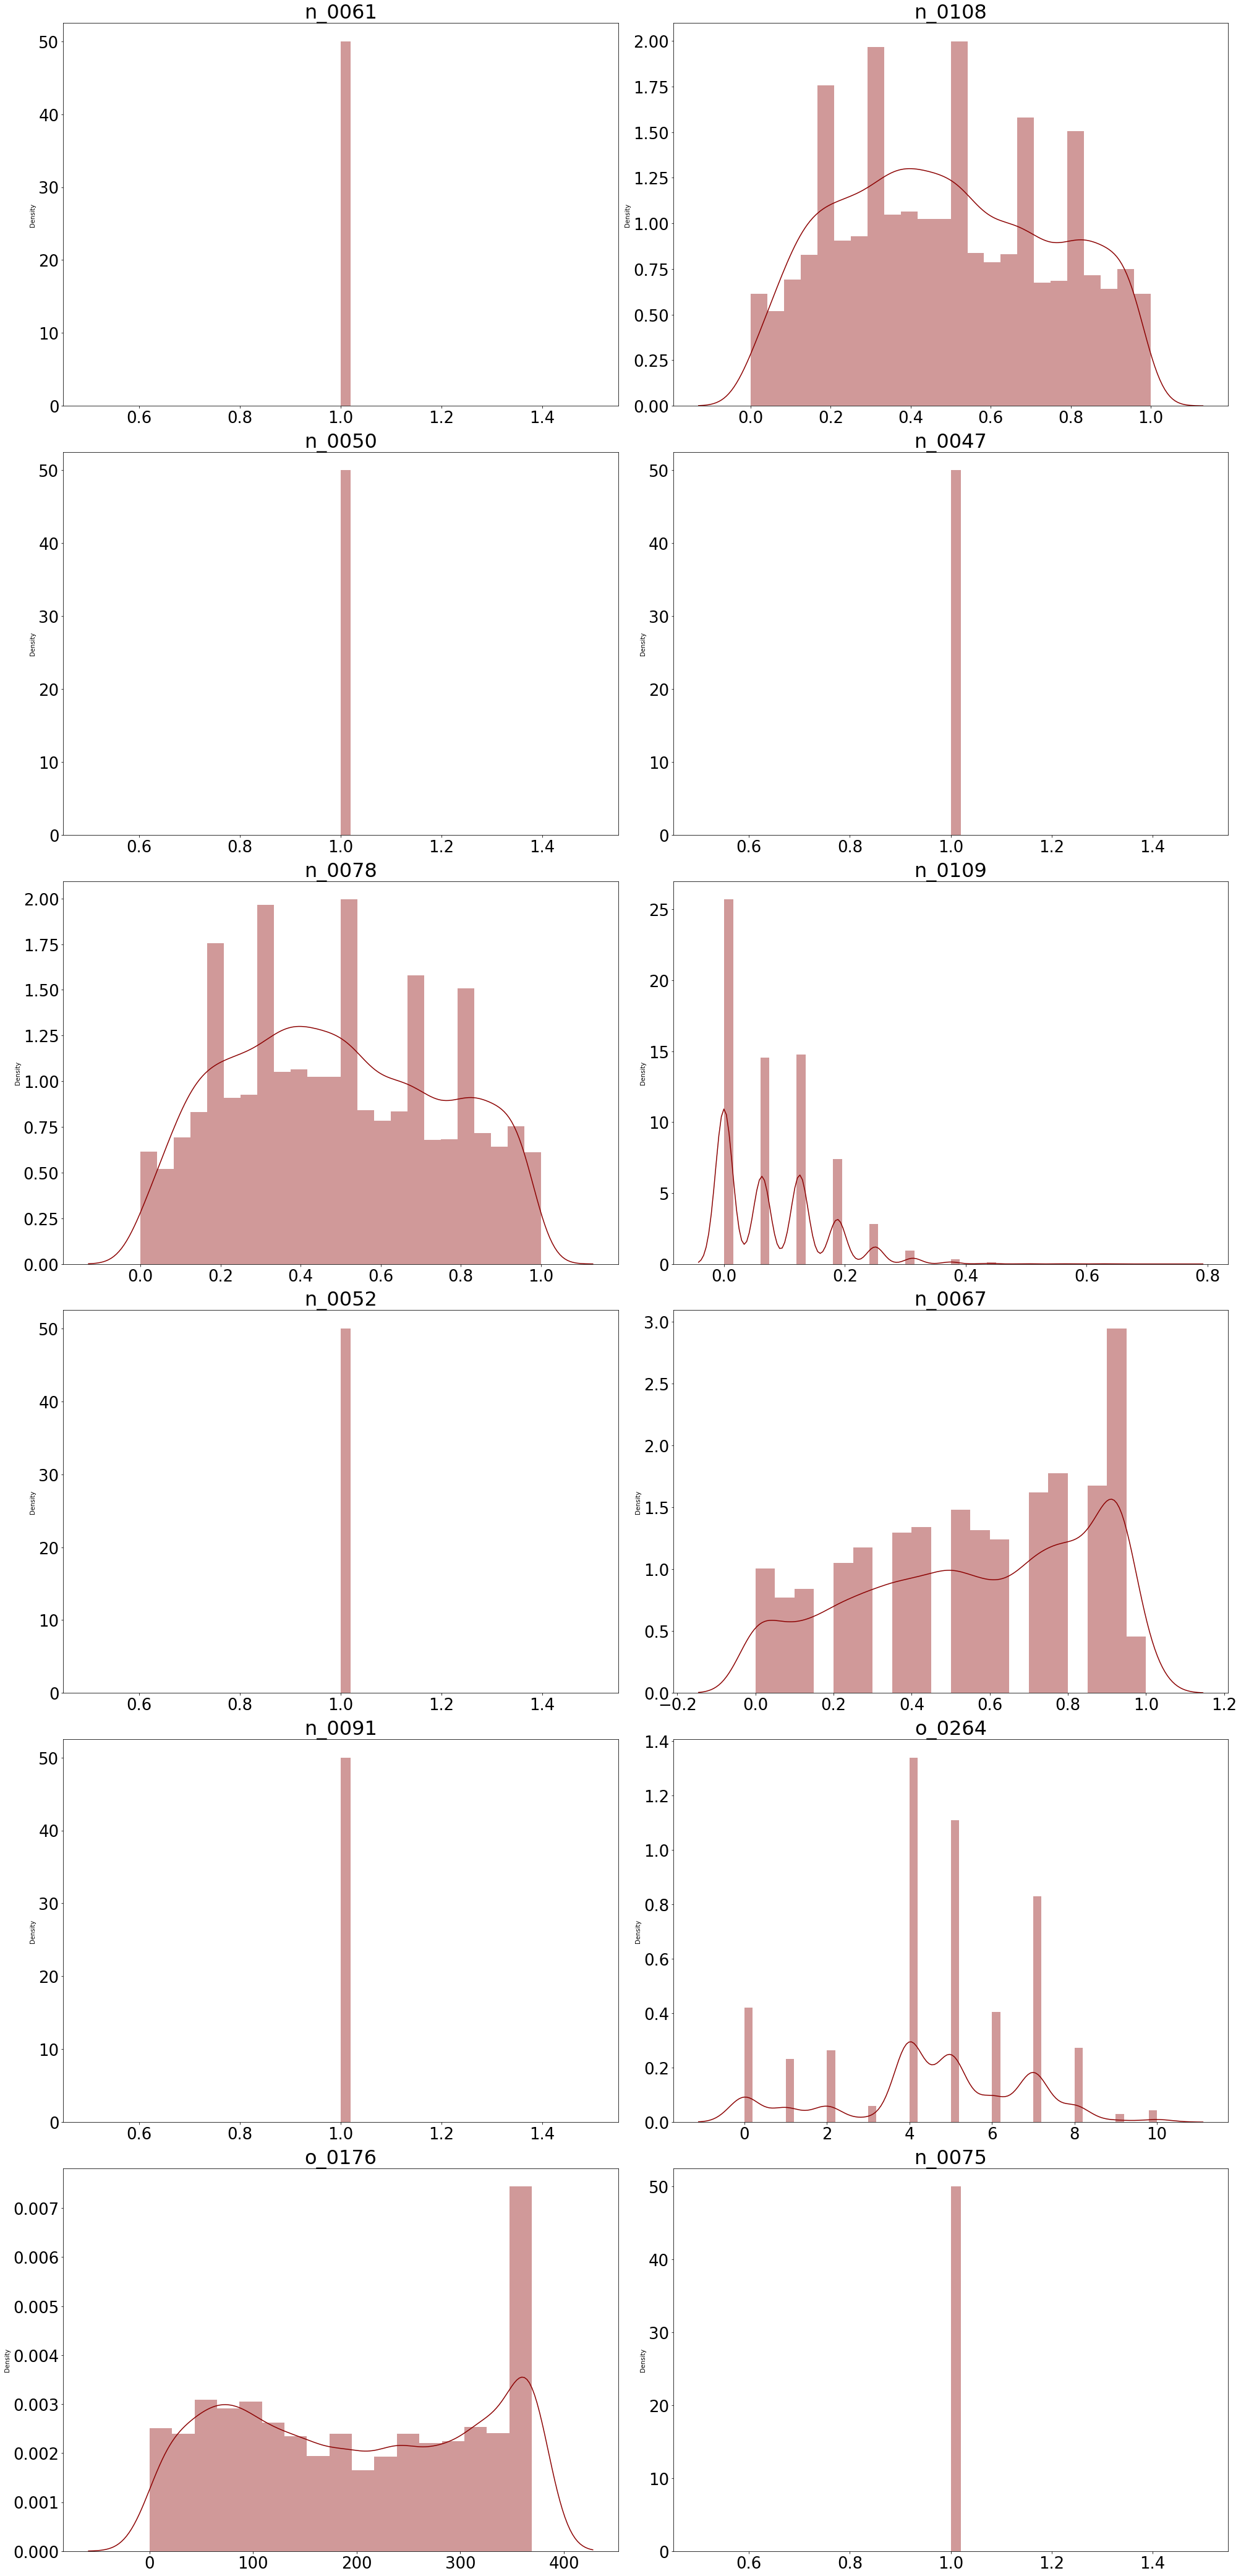

In [40]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (28, 63))

for ax, column in zip(axes.flatten(), train[noNAs].select_dtypes(include=numerics).columns):
    sns.distplot(train[column], ax = ax, color = 'darkred')
    
    ax.set_title(column, fontsize = 32)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
    ax.set_xlabel('')
    
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

У нас есть не несущие в себе информацию столбцы, а именно те, кто состоят из одних 1. А также есть полностью NA'шные столбцы, не несущие, получается, также никакой информации.

Давайте удалим их, а также среди достаточно полных NA'шных аналогичные (заполненные лишь одним значением) столбцы.

In [25]:
train_dropped = []
for col in train.columns:
    if (train[col].isnull().sum() <= 1000) & (len(train[col].value_counts()) == 1) or \
        (train[col].isnull().sum() == train.shape[0]):
            train_dropped.append(col)
            train = train.drop(col, axis=1)

In [26]:
test_dropped = []
for col in test.columns:
    if (test[col].isnull().sum() <= 1000) & (len(test[col].value_counts()) == 1) or \
        (test[col].isnull().sum() == test.shape[0]):
            test_dropped.append(col)
            test = test.drop(col, axis=1)

Проверим, выкинули ли мы только одинаковые колонки.

In [27]:
train_dropped == test_dropped
## ???

False

Выкинем из test'а то, что выкинули из train'а, но из test'а еще нет.

In [28]:
to_drop = list(set(train_dropped) - set(test_dropped))
for col in to_drop:
    test_dropped.append(col)
    test = test.drop(col, axis=1)

Выкинем из train'а то, что выкинули из test'а, но из train'а еще нет.

In [29]:
to_drop = list(set(test_dropped) - set(train_dropped))
for col in to_drop:
    train_dropped.append(col)
    train = train.drop(col, axis=1)

In [30]:
sorted(train_dropped) == sorted(test_dropped)

True

Проверим вообще, остались ли у нас одинаковые столбцы в train и test, или что-то поломалось.

In [31]:
sorted(train.columns) == sorted(test.columns)

True

Так, все хорошо. Это радует.

In [41]:
bold("**Mean percentage of missing values among train columns with NaNs:**")
display(
        (train.isnull().sum() / len(train) * 100).mean(),
        np.median(np.array((train.isnull().sum() / len(train) * 100)))
)

**Mean percentage of missing values among train columns with NaNs:**

80.46380471380472

94.81875

Было:
<br>82.65881073241479
<br>97.46249999999999

In [42]:
bold("**Mean percentage of missing values among test columns with NaNs:**")
display(
        (test.isnull().sum() / len(test) * 100).mean(),
        np.median(np.array((test.isnull().sum() / len(test) * 100)))
)

**Mean percentage of missing values among test columns with NaNs:**

80.14276094276094

94.55

Было:
<br>82.38531544597535
<br>97.3

In [43]:
bold('**Shape of our train &test data:**')
display(train.shape, test.shape)

**Shape of our train &test data:**

(8000, 1188)

(2000, 1188)

Было:
<br>(8000, 1379)
<br>(2000, 1379)

Минус 191 столбец.

В общем, информативность чутка у нас повысилась, ура.

Теперь вспомним, что у нас есть относительно небольше число столбцов, где NA'шек относительно немного + это numeric столбцы.

In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
almost_good_cols = []

for col in train.select_dtypes(include=numerics).columns:
    if (train[col].isnull().sum() <= 1000) & (train[col].isnull().sum() > 0):
        almost_good_cols.append(col)
        
print(len(almost_good_cols))

9


А давайте построим гистограммы и для них.

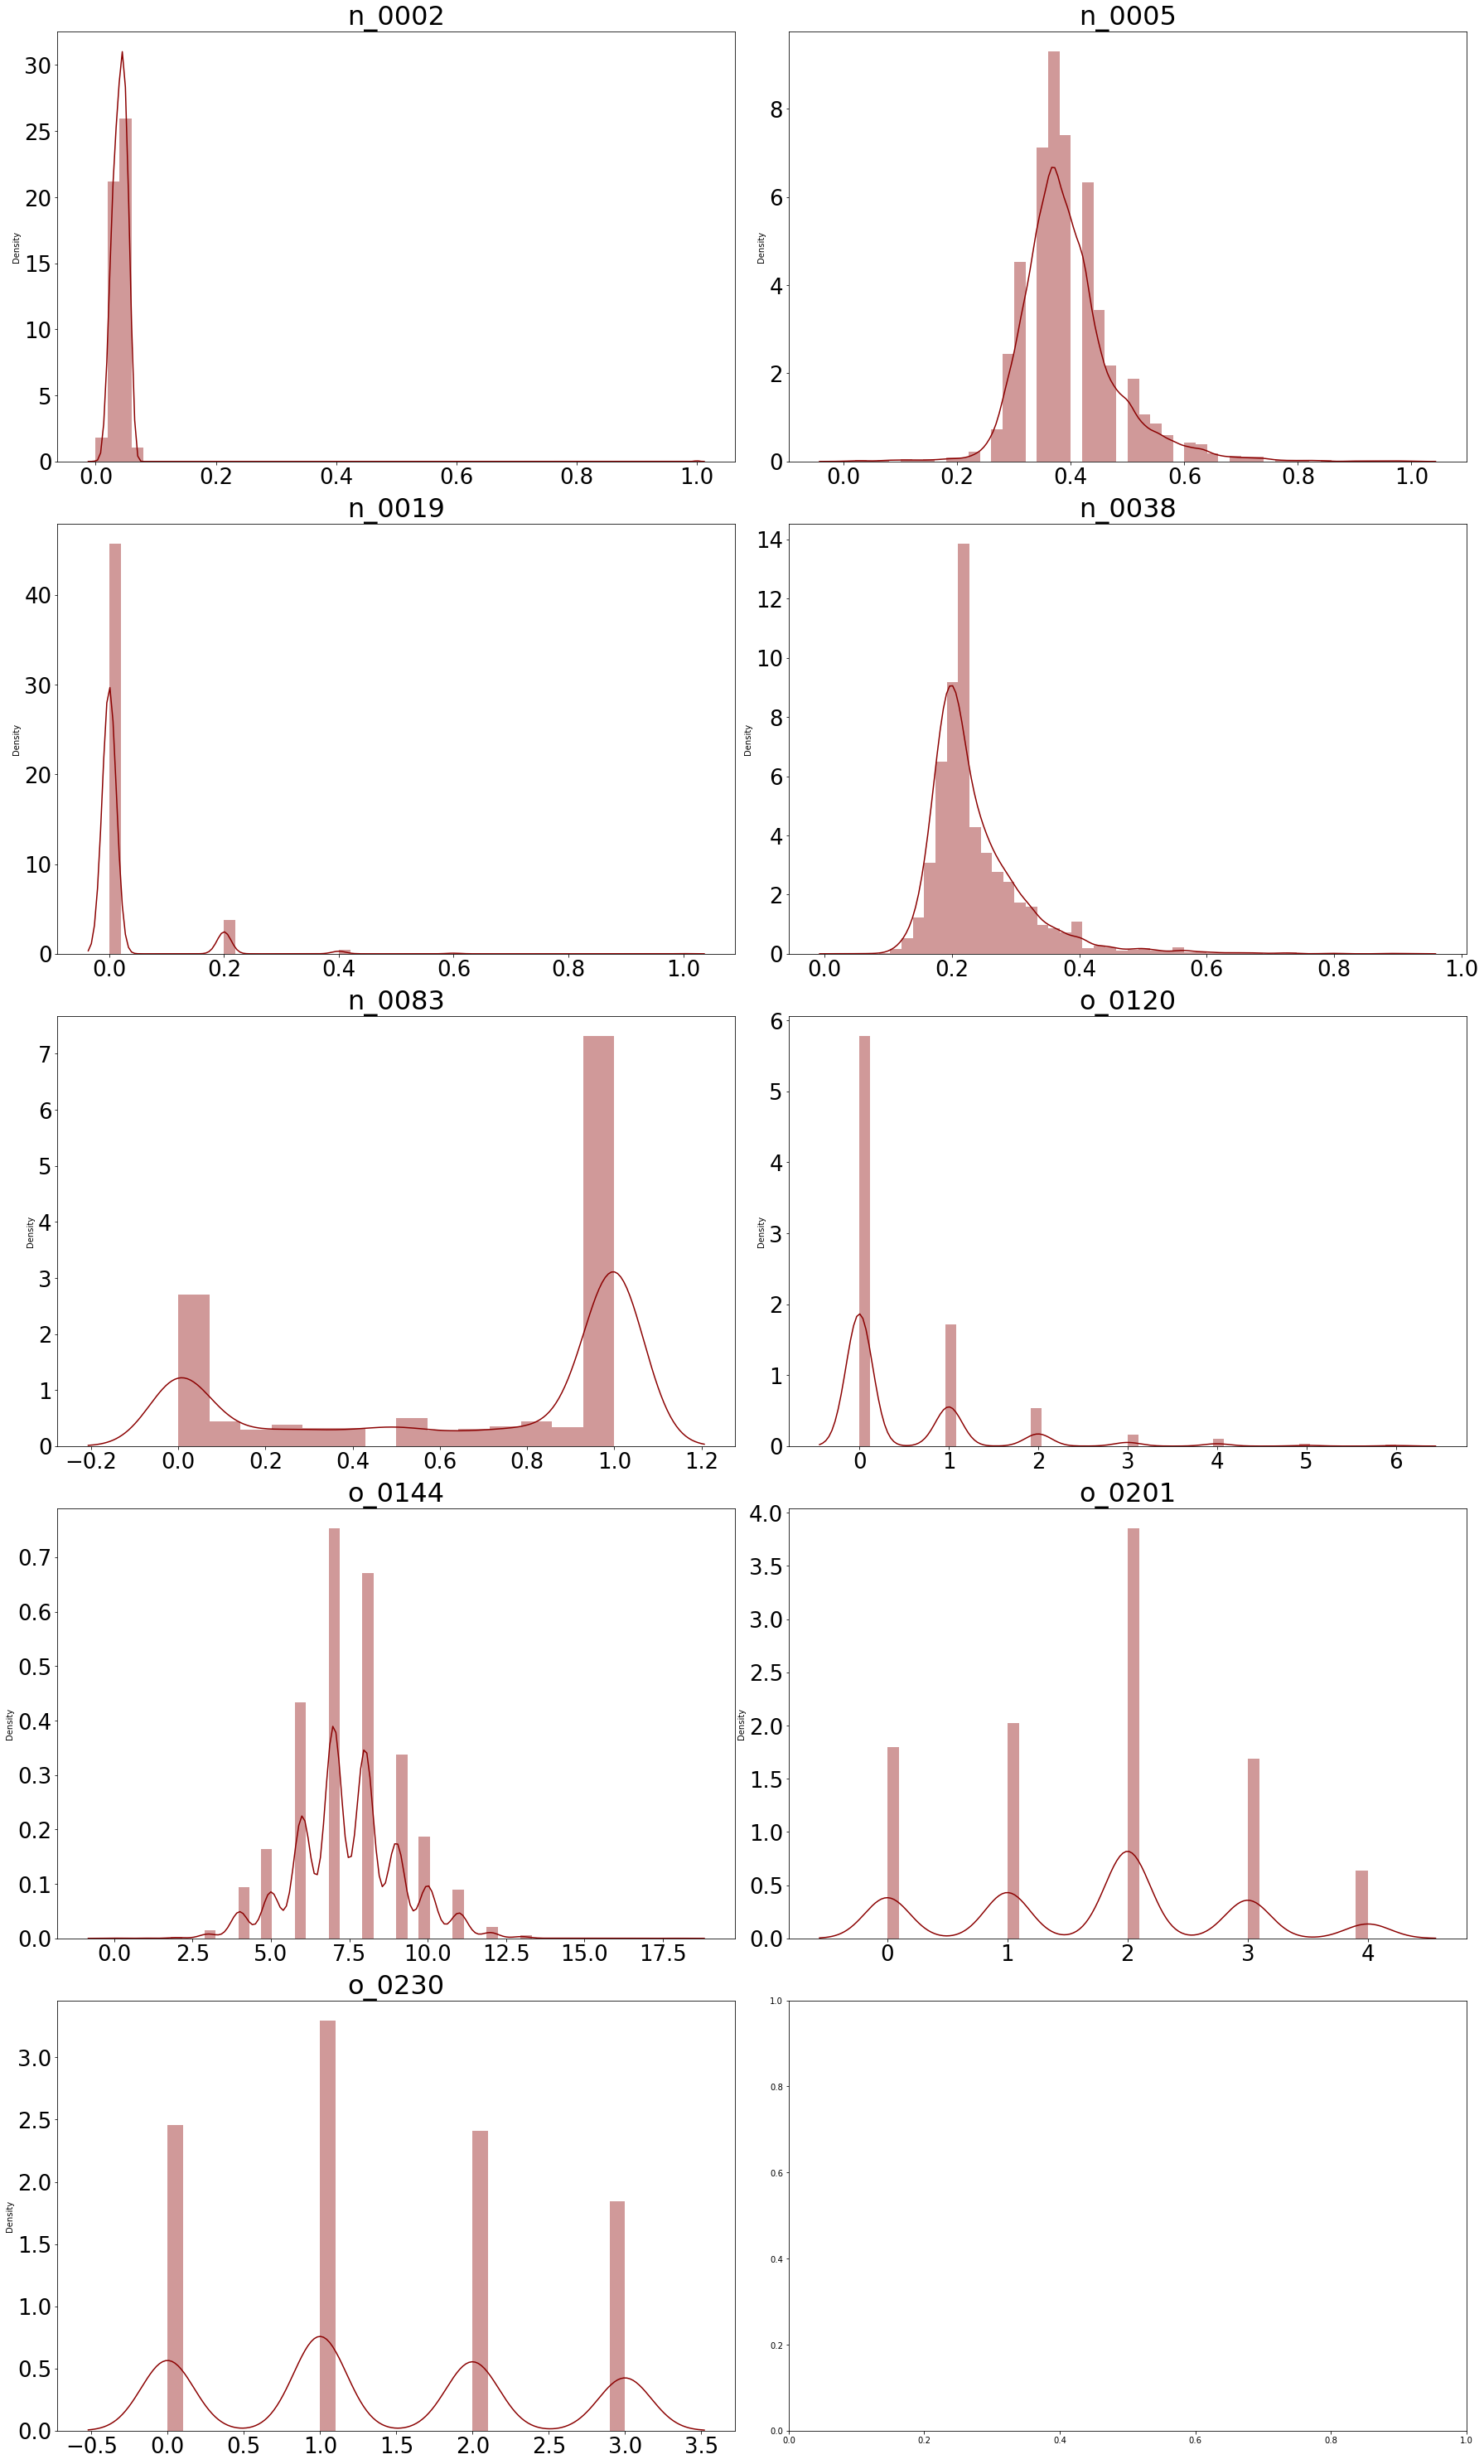

In [44]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (25, 45))

for ax, column in zip(axes.flatten(), train[almost_good_cols].select_dtypes(include=numerics).columns):
    sns.distplot(train[column], ax = ax, color = 'darkred')
    
    ax.set_title(column, fontsize = 32)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
    ax.set_xlabel('')
    
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

```n_0019``` не кажется значимым столбцом, нужно проверять на классах, где logloss плох.

Столбцы у нас делятся на 4 группы: release (особняком), n_ (самая малочисленная), o), c_ (самая многочисленная).

Давайте отдельно посмотрим на колонку release и на ее корреляцию с отрисованными колонками выше.

In [33]:
target = train['release']
target = LabelEncoder().fit_transform(target)
target

array([0, 0, 0, ..., 2, 2, 2])

Text(0.5, 3.200000000000003, '')

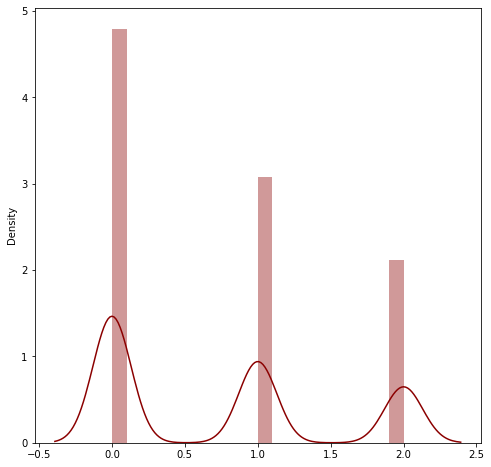

In [51]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

sns.distplot(target, color = 'darkred')
    
ax.set_title(column, fontsize = 32)
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
ax.set_xlabel('')

In [34]:
train_noNas = list(train.iloc[:, list(train.isnull().any() == False)].columns)
test_noNas = list(test.iloc[:, list(test.isnull().any() == False)].columns)
noNAs = list(set(train_noNas) & set(test_noNas))

In [35]:
col_corr = list(set(noNAs).union(set(almost_good_cols)))
col_corr.remove('release')
len(col_corr)

32

False


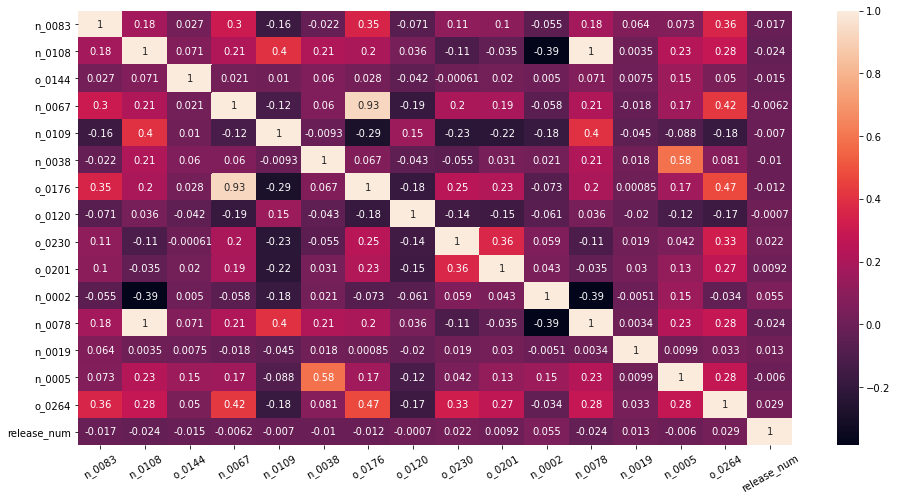

In [54]:
train['release_num'] = target
col_corr.append('release_num')

cor = train[col_corr].select_dtypes(include=numerics).corr()

train = train.drop('release_num', axis=1)


plt.figure(figsize=(16, 8))
sns.heatmap(cor, cmap='rocket', annot=True)
plt.xticks(rotation=30);

print('release_num' in train.columns)

Непосредственно на этом этапе происходил анализ все-таки release_num и при данном (мне нравится) способе кодирования release_num выглядит значимым признаком (да и по смыслу все же тоже предполагалось).

<br>Насчет остальных жестких корреляций бы сказал так, что мы чуть позже подчистим. Перед зафилливанием.

In [36]:
n_cols = []
o_cols = []
c_cols = []

for i in range(0, train.shape[1]):
    if ('n_' in train.columns[i]):
        n_cols.append(train.columns[i])
        
    elif ('o_' in train.columns[i]):
        o_cols.append(train.columns[i])
        
    elif ('c_' in train.columns[i]):
        c_cols.append(train.columns[i])

In [37]:
bold("**The number of columns in each group (n, o, c) for train data:**")
display(
    len(n_cols),
    len(o_cols),
    len(c_cols)
)

**The number of columns in each group (n, o, c) for train data:**

105

172

910

In [38]:
n_cols_test = []
o_cols_test = []
c_cols_test = []

for i in range(0, test.shape[1]):
    if ('n_' in test.columns[i]):
        n_cols_test.append(test.columns[i])
        
    elif ('o_' in test.columns[i]):
        o_cols_test.append(test.columns[i])
        
    elif ('c_' in test.columns[i]):
        c_cols_test.append(test.columns[i])

In [39]:
bold("**The number of columns in each group (n, o, c) for test data:**")
display(
    len(n_cols_test),
    len(o_cols_test),
    len(c_cols_test)
)

**The number of columns in each group (n, o, c) for test data:**

105

172

910

Такое же соотношение, что логично -- мы же почистили ровно.

In [40]:
n_noNas = list(train[n_cols].iloc[:, list(train[n_cols].isnull().any() == False)].columns)

bold("**Columns with no missing values in train data's n_cols:**")
display(
    len(n_noNas),
    train[n_noNas].dtypes
)

**Columns with no missing values in train data's n_cols:**

4

n_0067    float64
n_0078    float64
n_0108    float64
n_0109    float64
dtype: object

In [41]:
n_noNas_test = list(test[n_cols_test].iloc[:, list(test[n_cols_test].isnull().any() == False)].columns)

bold("**Columns with no missing values in test data's n_cols:**")
display(
    len(n_noNas_test),
    test[n_noNas_test].dtypes
)

**Columns with no missing values in test data's n_cols:**

4

n_0067    float64
n_0078    float64
n_0108    float64
n_0109    float64
dtype: object

In [42]:
bold("**Mean percentage of missing values among train n_cols with NaNs:**")
display(
        (train[n_cols].isnull().sum() / len(train[n_cols]) * 100).mean(),
        np.median(np.array((train[n_cols].isnull().sum() / len(train[n_cols]) * 100)))
)

**Mean percentage of missing values among train n_cols with NaNs:**

81.36773809523811

95.15

In [43]:
o_noNas = list(train[o_cols].iloc[:, list(train[o_cols].isnull().any() == False)].columns)

bold("**Columns with no missing values in train data's o_cols:**")
display(
    len(o_noNas),
    train[o_noNas].dtypes
)

**Columns with no missing values in train data's o_cols:**

2

o_0176    int64
o_0264    int64
dtype: object

In [44]:
o_noNas_test = list(test[o_cols_test].iloc[:, list(test[o_cols_test].isnull().any() == False)].columns)

bold("**Columns with no missing values in test data's o_cols:**")
display(
    len(o_noNas_test),
    test[o_noNas_test].dtypes
)

**Columns with no missing values in test data's o_cols:**

2

o_0176    int64
o_0264    int64
dtype: object

In [45]:
bold("**Mean percentage of missing values among train o_cols with NaNs:**")
display(
        (train[o_cols].isnull().sum() / len(train[o_cols]) * 100).mean(),
        np.median(np.array((train[o_cols].isnull().sum() / len(train[o_cols]) * 100)))
)

**Mean percentage of missing values among train o_cols with NaNs:**

86.20719476744186

96.38749999999999

In [46]:
c_noNas = list(train[c_cols].iloc[:, list(train[c_cols].isnull().any() == False)].columns)

bold("**Columns with no missing values in train data's c_cols:**")
display(
    len(c_noNas),
    train[c_noNas].dtypes
)

**Columns with no missing values in train data's c_cols:**

18

c_0466    object
c_0500    object
c_0638    object
c_0699    object
c_0738    object
c_0761    object
c_0770    object
c_0838    object
c_0870    object
c_0980    object
c_1145    object
c_1158    object
c_1189    object
c_1223    object
c_1227    object
c_1244    object
c_1259    object
c_1348    object
dtype: object

In [47]:
c_noNas_test = list(test[c_cols_test].iloc[:, list(test[c_cols_test].isnull().any() == False)].columns)

bold("**Columns with no missing values in test data's c_cols:**")
display(
    len(c_noNas_test),
    test[c_noNas_test].dtypes
)

**Columns with no missing values in test data's c_cols:**

20

c_0368    object
c_0466    object
c_0500    object
c_0638    object
c_0699    object
c_0738    object
c_0761    object
c_0770    object
c_0838    object
c_0870    object
c_0980    object
c_0996    object
c_1004    object
c_1145    object
c_1158    object
c_1189    object
c_1223    object
c_1227    object
c_1244    object
c_1259    object
dtype: object

In [48]:
bold("**Mean percentage of missing values among train c_cols with NaNs:**")
display(
        (train[c_cols].isnull().sum() / len(train[c_cols]) * 100).mean(),
        np.median(np.array((train[c_cols].isnull().sum() / len(train[c_cols]) * 100)))
)

**Mean percentage of missing values among train c_cols with NaNs:**

79.36236263736264

94.25625

In [49]:
c_full_train = list(
    set(c_noNas) - set(c_noNas_test)
)
c_full_test = list(
    set(c_noNas_test) - set(c_noNas)
)

print(
    c_full_train,
    c_full_test,
    sep='\n'
)

['c_1348']
['c_0996', 'c_1004', 'c_0368']


In [50]:
c_noNas.remove('c_1348')
c_noNas_test.remove('c_0368')
c_noNas_test.remove('c_0996')
c_noNas_test.remove('c_1004')

c_noNas_full = c_noNas + c_full_train
c_noNas_full_test = c_noNas_test + c_full_test


print(
    list(set(c_noNas) - set(c_noNas_test)),
    list(set(c_noNas_test) - set(c_noNas)),
    sep='\n'
)

[]
[]


Вот только для с-колонок оказалось другое зафилливание. Вообще все колонки сохраняем: одна вообще класс (train), а другие 3 круто зафиллить нужно будет (test).

Да уж, видимо, есть какие-то офигенные колонки, хотя в среднем оч плохо.
<br>Нужно бы найти это офигенные колонки.

По всей видимости, группы различаются как минимум типами (float64, int64, string). Проверим это:

In [63]:
print('n_cols types: ', set(train[n_cols].dtypes), '\n',
     'o_cols types: ',  set(train[o_cols].dtypes), '\n',
     'c_cols types: ',  set(train[c_cols].dtypes),
     sep='')

n_cols types: {dtype('float64')}
o_cols types: {dtype('int64'), dtype('float64')}
c_cols types: {dtype('O')}


Посмотрим на соотношение типов в ```o_cols```:

In [62]:
bold("**Train o_cols types:**")

display(
    train[o_cols].dtypes.value_counts()
)

**Train o_cols types:**

float64    170
int64        2
dtype: int64

Полагаю, отдельно еще посмотрим на такое подразбиение внутри групп.

<br>Пока еще напоследок посмотрим, сколько в каждой группе не совсем отвратных столбцов (<= 7000 NAs).

In [68]:
bold("**Number of Not-So-Bad Columns in n_cols:**")
display(
    str(
        len(
            train[n_cols][(train[n_cols].isnull().sum() <= 7000).index[(train[n_cols].isnull().sum() <= 7000)]].columns
        )
    ) + \
    ' of ' + \
    str(
        len(
            n_cols
        )
    )
)

**Number of Not-So-Bad Columns in n_cols:**

'37 of 105'

In [69]:
bold("**Number of Not-So-Bad Columns in o_cols:**")
display(
    str(
        len(
            train[o_cols][(train[o_cols].isnull().sum() <= 7000).index[(train[o_cols].isnull().sum() <= 7000)]].columns
        )
    ) + \
    ' of ' + \
    str(
        len(
            o_cols
        )
    )
)

**Number of Not-So-Bad Columns in o_cols:**

'50 of 172'

In [70]:
bold("**Number of Not-So-Bad Columns in c_cols:**")
display(
    str(
        len(
            train[c_cols][(train[c_cols].isnull().sum() <= 7000).index[(train[c_cols].isnull().sum() <= 7000)]].columns
        )
    ) + \
    ' of ' + \
    str(
        len(
            c_cols
        )
    )
)

**Number of Not-So-Bad Columns in c_cols:**

'310 of 910'

Если честно, то нам все равно в будущем придется делать понижение размерности. Почему бы просто не поработать только с не такими уж и плохими столбцами (мб и понижение никакое делать не нужно будет)? Подумаем над этим чуть позже.

---

## Finishing the baseline models

Заметим, что категориальных столбцов больше, чем остальных вместе взятых. Посмотрим на них и доделаем baseline model.

In [70]:
train['c_0466']  

0       a
1       a
2       c
3       c
4       b
       ..
7995    b
7996    c
7997    a
7998    b
7999    a
Name: c_0466, Length: 8000, dtype: object

Если честно, то мне выглядит довольно разумным кодировать все через ```OneHotEncoder```, правда, в будущем нам, возможно, придется работать с большим числом столбцов, тогда ```OneHotEncoder``` нам может не особо подойти.

In [ ]:
train_ohe = train.copy()
train_ohe = OneHotEncoder(handle_unknown="ignore").fit_transform(train_ohe[c_noNas_full])

In [89]:
bold('**Shape of our train & train_ohe data:**')
display(train[c_noNas_full].shape, train_ohe.shape)

**Shape of our train & train_ohe data:**

(8000, 18)

(8000, 101)

In [90]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

svc = SVC(
    kernel='sigmoid',
    probability=True,
    random_state=42
)

# Данные нужно нормализовать, но они тут на глаз (да, не хорошо) все на [0, 1]
knnc = KNeighborsClassifier(
    n_neighbors=6,    ## В среднем у нас объект всего к чуть больше, чем 3м классам принадлежит
    radius=0.25,
    n_jobs=-1
)

lgbmc = LGBMClassifier()

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'SVC': svc,
    'kNNC': knnc,
    'LGBM': lgbmc,
    'CB': cbc
}
predicts = []

In [92]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train_ohe,
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.4191
LR 1 test logloss = 0.5158
LR 2 test logloss = 0.5258
LR 3 test logloss = 0.0563
LR 4 test logloss = 0.1894
LR 5 test logloss = 0.1121
LR 6 test logloss = 0.1801
LR 7 test logloss = 0.4803
LR 8 test logloss = 0.0754
LR 9 test logloss = 0.3803
LR 10 test logloss = 0.4720
LR 11 test logloss = 0.2809
LR 12 test logloss = 0.2426
LR 13 test logloss = 0.4204

LR took 3.7 s
---------------
LR test multiclass LogLoss = 0.3107


SVC 0 test logloss = 0.6050
SVC 1 test logloss = 0.6092
SVC 2 test logloss = 0.5657
SVC 3 test logloss = 0.0703
SVC 4 test logloss = 0.2034
SVC 5 test logloss = 0.1251
SVC 6 test logloss = 0.1951
SVC 7 test logloss = 0.5844
SVC 8 test logloss = 0.0794
SVC 9 test logloss = 0.4154
SVC 10 test logloss = 0.5172
SVC 11 test logloss = 0.3259
SVC 12 test logloss = 0.2919
SVC 13 test logloss = 0.4541

SVC took 3e+02 s
---------------
SVC test multiclass LogLoss = 0.3602


kNNC 0 test logloss = 1.1619
kNNC 1 test logloss = 1.4766
kNNC 2 test logloss = 

Было:
<br>LR test multiclass LogLoss = 0.3475
<br>SVC test multiclass LogLoss = 0.3754
<br>kNNC test multiclass LogLoss = 1.3332
<br>LGBM test multiclass LogLoss = 0.3565
<br>CB test multiclass LogLoss = 0.3470

Видим, что работа только с категориальными признаками, в принципе, довольно значимо подняла скор.

Также, дальше однозначно будет работать только с LR и CB.
<br>Причем в этот раз CB показал себя похуже LR.

---

## Model I.1

Давайте посмотрим, что будет, если NaNs заменить 0мя или '' (в зависимости от типа), на веса лог регресии это не повлияет (но catboost все же тоже протестируем).

In [93]:
train_zeros = train.copy()
train_zeros = train_zeros.fillna(0)

str_cols = train_zeros.select_dtypes(include='object').columns
train_zeros[str_cols] = train_zeros[str_cols].astype('str')

train_zeros.head()

release  n_0000  n_0001    n_0002  n_0003  n_0004    n_0005  n_0006  n_0007  \
0       a     0.0     0.0  0.025449     0.0     0.0  0.368421     0.0     0.0   
1       a     0.0     0.0  0.031297     0.0     0.0  0.315789     0.0     0.0   
2       a     0.0     0.0  0.024475     0.0     0.0  0.342105     0.0     0.0   
3       a     0.0     0.0  0.041694     0.0     0.0  0.447368     0.0     0.0   
4       c     0.0     0.0  0.038120     0.0     0.0  0.315789     0.0     0.0   

   n_0009  ...  c_1366  c_1367  c_1369  c_1370  c_1372  c_1373  c_1374  \
0     0.0  ...       0       0       0       0       a       0       q   
1     0.0  ...       0       0       0       a       a       0       0   
2     0.0  ...       0       0       0       a       a       0       b   
3     0.0  ...       0       0       0       0       a       0       0   
4     0.0  ...       0       0       0       b       a       0       a   

   c_1375  c_1376  c_1377  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 1188 columns]

In [115]:
train_zeros = train.copy()

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = train_zeros.select_dtypes(include=numerics).columns
train_zeros[num_cols] = train_zeros[num_cols].fillna(0)

str_cols = train_zeros.select_dtypes(include='object').columns
train_zeros[str_cols] = train_zeros[str_cols].fillna('')

train_zeros.head()

release  n_0000  n_0001    n_0002  n_0003  n_0004    n_0005  n_0006  n_0007  \
0       a     0.0     0.0  0.025449     0.0     0.0  0.368421     0.0     0.0   
1       a     0.0     0.0  0.031297     0.0     0.0  0.315789     0.0     0.0   
2       a     0.0     0.0  0.024475     0.0     0.0  0.342105     0.0     0.0   
3       a     0.0     0.0  0.041694     0.0     0.0  0.447368     0.0     0.0   
4       c     0.0     0.0  0.038120     0.0     0.0  0.315789     0.0     0.0   

   n_0009  ...  c_1366  c_1367  c_1369  c_1370  c_1372  c_1373  c_1374  \
0     0.0  ...                                       a               q   
1     0.0  ...                               a       a                   
2     0.0  ...                               a       a               b   
3     0.0  ...                                       a                   
4     0.0  ...                               b       a               a   

   c_1375  c_1376  c_1377  
0                          
1                          
2                          
3                          
4                          

[5 rows x 1188 columns]

In [116]:
train_zeros_ohe = OneHotEncoder(handle_unknown="ignore").fit_transform(train_zeros[str_cols])
train_zeros_ohe = pd.DataFrame.sparse.from_spmatrix(train_zeros_ohe)
train_zeros_ohe.shape

(8000, 6214)

In [117]:
train_zeros = train_zeros.select_dtypes(include=numerics)
train_zeros = pd.concat([train_zeros, train_zeros_ohe], axis=1, join="inner")
train_zeros.shape

(8000, 6491)

In [118]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'CB': cbc
}
predicts = []

In [119]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train_ohe,
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.4191
LR 1 test logloss = 0.5158
LR 2 test logloss = 0.5258
LR 3 test logloss = 0.0563
LR 4 test logloss = 0.1894
LR 5 test logloss = 0.1121
LR 6 test logloss = 0.1801
LR 7 test logloss = 0.4803
LR 8 test logloss = 0.0754
LR 9 test logloss = 0.3803
LR 10 test logloss = 0.4720
LR 11 test logloss = 0.2809
LR 12 test logloss = 0.2426
LR 13 test logloss = 0.4204

LR took 9.8 s
---------------
LR test multiclass LogLoss = 0.3107


CB 0 test logloss = 0.4234
CB 1 test logloss = 0.5256
CB 2 test logloss = 0.5328
CB 3 test logloss = 0.0582
CB 4 test logloss = 0.1917
CB 5 test logloss = 0.1181
CB 6 test logloss = 0.1883
CB 7 test logloss = 0.4927
CB 8 test logloss = 0.0803
CB 9 test logloss = 0.3793
CB 10 test logloss = 0.4743
CB 11 test logloss = 0.2764
CB 12 test logloss = 0.2444
CB 13 test logloss = 0.4332

CB took 3.6e+02 s
---------------
CB test multiclass LogLoss = 0.3156




Лучшее:
<br>LR test multiclass LogLoss = 0.3107
<br>CB test multiclass LogLoss = 0.3156

<br>Ничего не изменилось, хе-хе.

---

## Model I.2

Зафиллим только numeric столбцы, а из строковых возьмем только не пустые.

In [71]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = train.select_dtypes(include=numerics).columns

train_zeros = train.copy()
train_zeros[num_cols] = train_zeros[num_cols].fillna(0)
train_zeros.head()

release  n_0000  n_0001    n_0002  n_0003  n_0004    n_0005  n_0006  n_0007  \
0       a     0.0     0.0  0.025449     0.0     0.0  0.368421     0.0     0.0   
1       a     0.0     0.0  0.031297     0.0     0.0  0.315789     0.0     0.0   
2       a     0.0     0.0  0.024475     0.0     0.0  0.342105     0.0     0.0   
3       a     0.0     0.0  0.041694     0.0     0.0  0.447368     0.0     0.0   
4       c     0.0     0.0  0.038120     0.0     0.0  0.315789     0.0     0.0   

   n_0009  ...  c_1366  c_1367  c_1369  c_1370  c_1372  c_1373  c_1374  \
0     0.0  ...     NaN     NaN     NaN     NaN       a     NaN       q   
1     0.0  ...     NaN     NaN     NaN       a       a     NaN     NaN   
2     0.0  ...     NaN     NaN     NaN       a       a     NaN       b   
3     0.0  ...     NaN     NaN     NaN     NaN       a     NaN     NaN   
4     0.0  ...     NaN     NaN     NaN       b       a     NaN       a   

   c_1375  c_1376  c_1377  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  

[5 rows x 1188 columns]

In [72]:
train_zeros = train_zeros.dropna(axis='columns')
train_zeros.shape

(8000, 296)

In [73]:
str_cols = train_zeros.select_dtypes(include='object').columns

train_zeros_ohe = OneHotEncoder(handle_unknown="ignore").fit_transform(train_zeros[str_cols])
train_zeros_ohe = pd.DataFrame.sparse.from_spmatrix(train_zeros_ohe)
train_zeros_ohe.shape

(8000, 104)

In [74]:
train_zeros = train_zeros.select_dtypes(include=numerics)
train_zeros = pd.concat([train_zeros, train_zeros_ohe], axis=1, join="inner")
train_zeros.shape

(8000, 381)

In [82]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'CB': cbc
}
predicts = []

In [83]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train_zeros,
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.4808
LR 1 test logloss = 0.5620
LR 2 test logloss = 0.5468
LR 3 test logloss = 0.0655
LR 4 test logloss = 0.1907
LR 5 test logloss = 0.1225
LR 6 test logloss = 0.1902
LR 7 test logloss = 0.5440
LR 8 test logloss = 0.0771
LR 9 test logloss = 0.3742
LR 10 test logloss = 0.4814
LR 11 test logloss = 0.2924
LR 12 test logloss = 0.2531
LR 13 test logloss = 0.3758

LR took 5.5e+01 s
---------------
LR test multiclass LogLoss = 0.3255


CB 0 test logloss = 0.3988
CB 1 test logloss = 0.5156
CB 2 test logloss = 0.5234
CB 3 test logloss = 0.0384
CB 4 test logloss = 0.1732
CB 5 test logloss = 0.0869
CB 6 test logloss = 0.1737
CB 7 test logloss = 0.4696
CB 8 test logloss = 0.0706
CB 9 test logloss = 0.3592
CB 10 test logloss = 0.4672
CB 11 test logloss = 0.2283
CB 12 test logloss = 0.1855
CB 13 test logloss = 0.3538

CB took 3.1e+02 s
---------------
CB test multiclass LogLoss = 0.2889




Лучшее:
<br>LR test multiclass LogLoss = 0.3107
<br>CB test multiclass LogLoss = 0.3156

Это, видимо, переоверфитило лог регрессию, но значительно улучшило catboost. Прикольно.

---

## Gap filling: part II

In [51]:
from operator import itemgetter 

Будем смотреть на группу 'n_', где ненулевых >= 1000: поймем, что у них с распределениями, попробуем восстановить плотности и по ним зафиллить NAs. Посмотрим еще в конце на корреляцию. Первый план действий какой-то такой.

In [52]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
string = ['str', 'object']

n_cols_num_train = []
n_cols_str_train = []

n_cols_num_test = []
n_cols_str_test = []

In [53]:
for i in range(0, len(n_cols)):
    if train[n_cols[i]].dtype in numerics:
        n_cols_num_train.append(n_cols[i])
        
    elif train[n_cols[i]].dtype in string:
        n_cols_str_train.append(n_cols[i])
        
    else:
        print('Error!')
        break
        
        
for i in range(0, len(n_cols_test)):
    if train[n_cols_test[i]].dtype in numerics:
        n_cols_num_test.append(n_cols_test[i])
        
    elif train[n_cols_test[i]].dtype in string:
        n_cols_str_test.append(n_cols_test[i])
        
    else:
        print('Error!')
        break
        
        
print(
    list(set(n_cols_num_train) - set(n_cols_num_test)),
    list(set(n_cols_num_test) - set(n_cols_num_train)),
    sep='\n'
)

[]
[]


In [71]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = train.select_dtypes(include=numerics).columns

train_zeros = train.copy()
train_zeros[num_cols] = train_zeros[num_cols].fillna(0)
train_zeros.head()

release  n_0000  n_0001    n_0002  n_0003  n_0004    n_0005  n_0006  n_0007  \
0       a     0.0     0.0  0.025449     0.0     0.0  0.368421     0.0     0.0   
1       a     0.0     0.0  0.031297     0.0     0.0  0.315789     0.0     0.0   
2       a     0.0     0.0  0.024475     0.0     0.0  0.342105     0.0     0.0   
3       a     0.0     0.0  0.041694     0.0     0.0  0.447368     0.0     0.0   
4       c     0.0     0.0  0.038120     0.0     0.0  0.315789     0.0     0.0   

   n_0009  ...  c_1366  c_1367  c_1369  c_1370  c_1372  c_1373  c_1374  \
0     0.0  ...     NaN     NaN     NaN     NaN       a     NaN       q   
1     0.0  ...     NaN     NaN     NaN       a       a     NaN     NaN   
2     0.0  ...     NaN     NaN     NaN       a       a     NaN       b   
3     0.0  ...     NaN     NaN     NaN     NaN       a     NaN     NaN   
4     0.0  ...     NaN     NaN     NaN       b       a     NaN       a   

   c_1375  c_1376  c_1377  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  

[5 rows x 1188 columns]

In [72]:
train_zeros = train_zeros.dropna(axis='columns')
train_zeros.shape

(8000, 296)

In [73]:
str_cols = train_zeros.select_dtypes(include='object').columns

train_zeros_ohe = OneHotEncoder(handle_unknown="ignore").fit_transform(train_zeros[str_cols])
train_zeros_ohe = pd.DataFrame.sparse.from_spmatrix(train_zeros_ohe)
train_zeros_ohe.shape

(8000, 104)

In [74]:
train_zeros = train_zeros.select_dtypes(include=numerics)
train_zeros = pd.concat([train_zeros, train_zeros_ohe], axis=1, join="inner")
train_zeros.shape

(8000, 381)

In [82]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'CB': cbc
}
predicts = []

In [83]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train_zeros,
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.4808
LR 1 test logloss = 0.5620
LR 2 test logloss = 0.5468
LR 3 test logloss = 0.0655
LR 4 test logloss = 0.1907
LR 5 test logloss = 0.1225
LR 6 test logloss = 0.1902
LR 7 test logloss = 0.5440
LR 8 test logloss = 0.0771
LR 9 test logloss = 0.3742
LR 10 test logloss = 0.4814
LR 11 test logloss = 0.2924
LR 12 test logloss = 0.2531
LR 13 test logloss = 0.3758

LR took 5.5e+01 s
---------------
LR test multiclass LogLoss = 0.3255


CB 0 test logloss = 0.3988
CB 1 test logloss = 0.5156
CB 2 test logloss = 0.5234
CB 3 test logloss = 0.0384
CB 4 test logloss = 0.1732
CB 5 test logloss = 0.0869
CB 6 test logloss = 0.1737
CB 7 test logloss = 0.4696
CB 8 test logloss = 0.0706
CB 9 test logloss = 0.3592
CB 10 test logloss = 0.4672
CB 11 test logloss = 0.2283
CB 12 test logloss = 0.1855
CB 13 test logloss = 0.3538

CB took 3.1e+02 s
---------------
CB test multiclass LogLoss = 0.2889




Лучшее:
<br>LR test multiclass LogLoss = 0.3107
<br>CB test multiclass LogLoss = 0.3156

In [54]:
n_cols_num = n_cols_num_train

if len(n_cols_num) == len(n_cols):
    print('True')
    
if len(n_cols_num_test) == len(n_cols_test):
    print('True')

True
True


In [55]:
mask = train[n_cols_num].isnull().sum() <= 7000
n_cols_num_not_bad = list(train[n_cols_num].columns[mask])

print(
    len(n_cols_num_not_bad)
)


mask = test[n_cols_num_test].isnull().sum() <= 7000
n_cols_num_not_bad_test = list(test[n_cols_num_test].columns[mask])

print(
    len(n_cols_num_not_bad_test)
)

37
105


Вообще говоря, не хорошо, но для данного метода пока что все равно.

In [56]:
mask = train[n_cols_num].isnull().sum() == 0
n_cols_num_good = list(train[n_cols_num].columns[mask])

print(
    len(n_cols_num_good)
)


mask = test[n_cols_num_test].isnull().sum() == 0
n_cols_num_good_test = list(test[n_cols_num_test].columns[mask])

print(
    len(n_cols_num_good_test)
)

4
4


In [57]:
n_cols_num_not_bad = list(
    set(n_cols_num_not_bad) - set(n_cols_num_good)
)
n_cols_num_not_bad.sort()

print(
    len(n_cols_num_not_bad)
)


n_cols_num_not_bad_test = list(
    set(n_cols_num_not_bad_test) - set(n_cols_num_good_test)
)
n_cols_num_not_bad_test.sort()

print(
    len(n_cols_num_not_bad_test)
)

33
101


Как $210 - 8$ превратилось в $101$.

In [58]:
print(n_cols_num_good)
print(itemgetter(*[17, 20, 31])(n_cols_num_not_bad))

print()

print(n_cols_num_good_test)
print(itemgetter(*[17, 20, 31])(n_cols_num_not_bad_test))

['n_0067', 'n_0078', 'n_0108', 'n_0109']
('n_0066', 'n_0080', 'n_0110')

['n_0067', 'n_0078', 'n_0108', 'n_0109']
('n_0019', 'n_0022', 'n_0033')


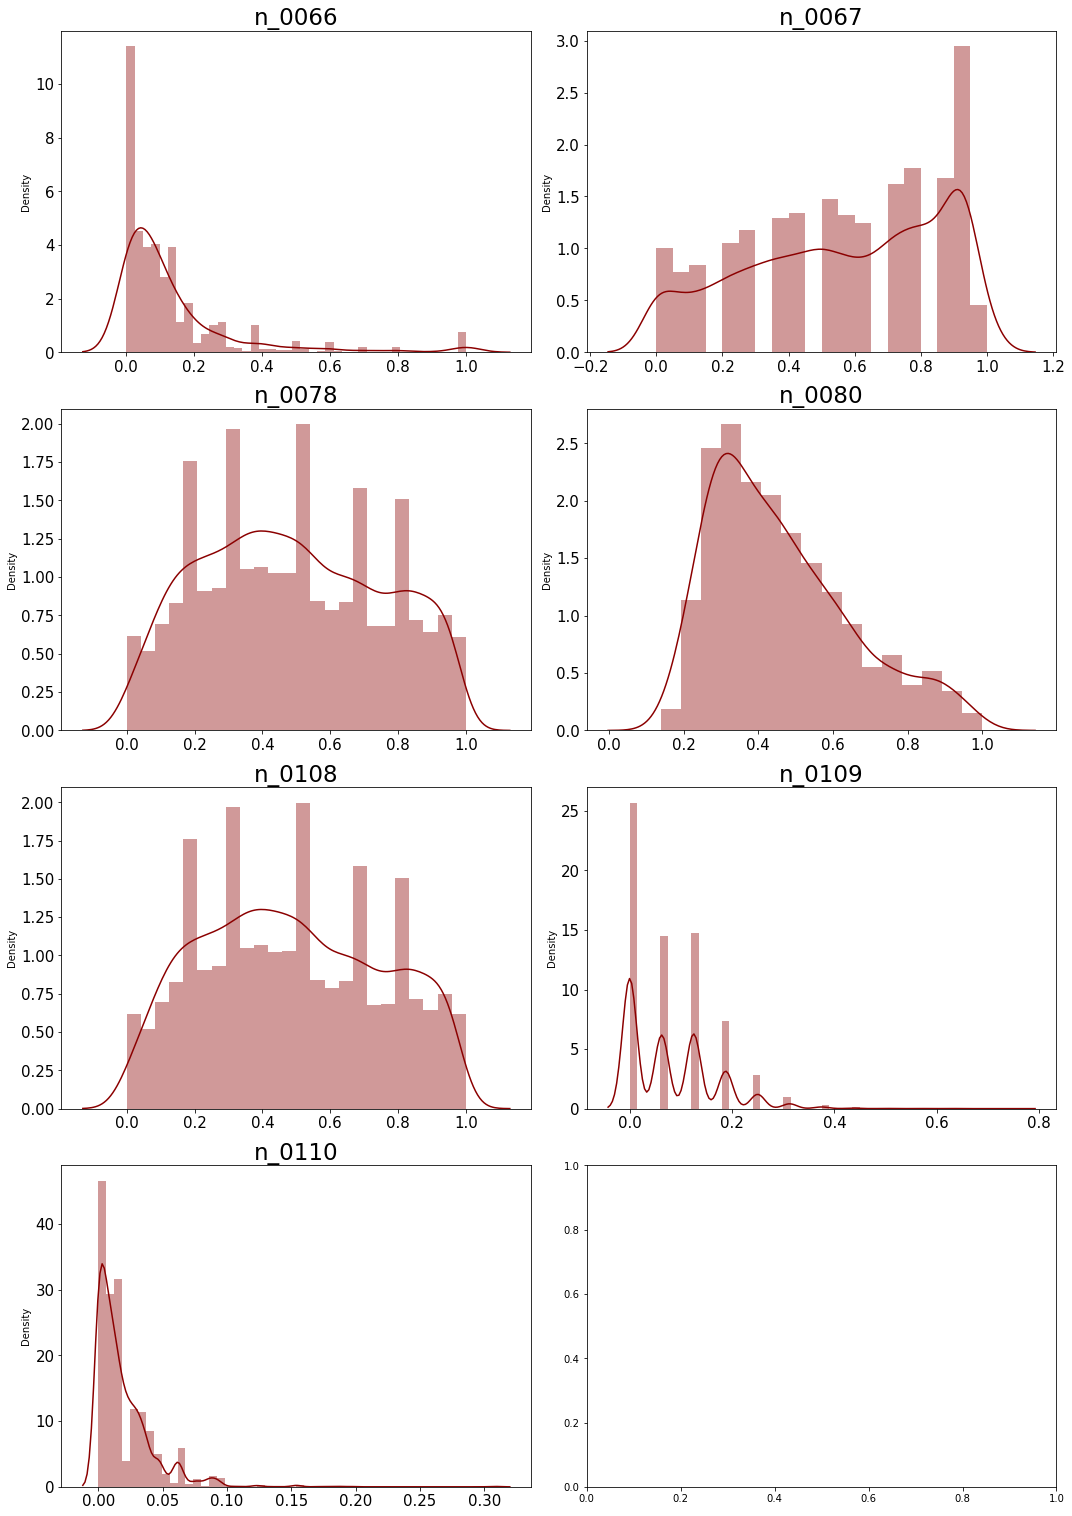

In [72]:
cols_for_plot = n_cols_num_good + list(itemgetter(*[17, 20, 31])(n_cols_num_not_bad))
cols_for_plot.sort()
cols_for_plot


fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 23))

for ax, column in zip(axes.flatten(), train[cols_for_plot].columns):
    sns.distplot(train[column], ax = ax, color = 'darkred')
    
    ax.set_title(column, fontsize = 23)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 15)
    ax.set_xlabel('')
    
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

Как видим, соседние номера нефига не похожи друг на друга, поэтому зафиллить плохого соседа по подобию хорошего не получится.

<br>Но у нас тут номера 8кой на конце совпали по распределениям, проверим.

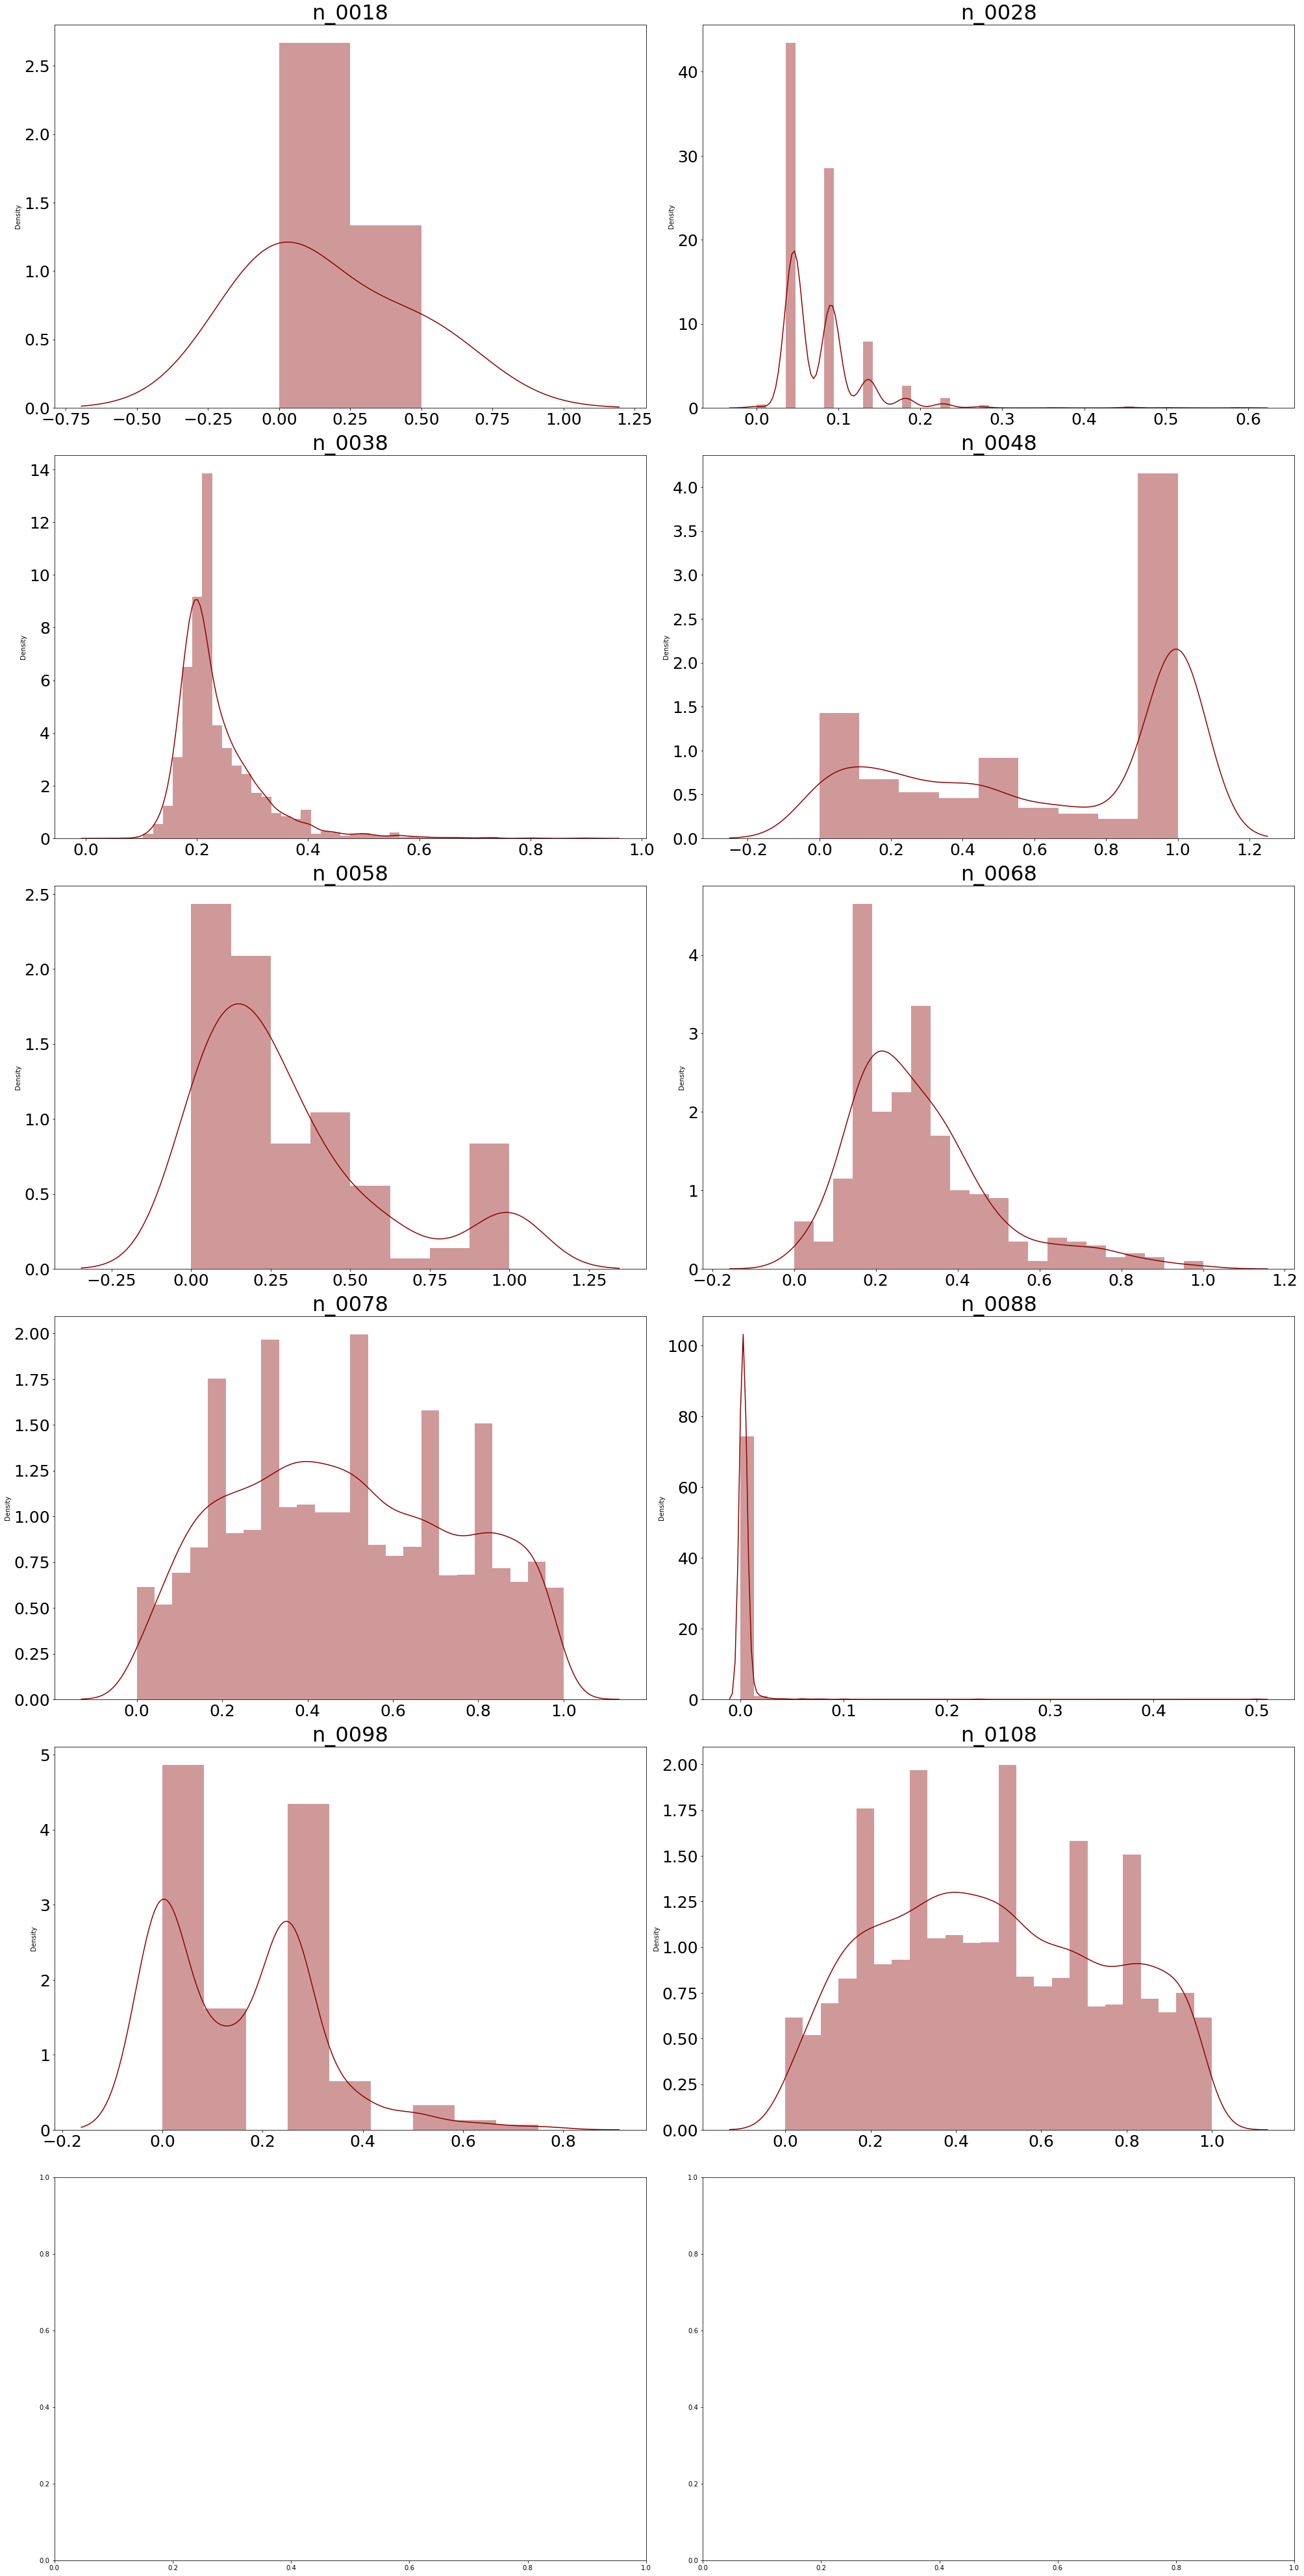

In [100]:
cols_for_plot = ['n_0018', 'n_0028', 'n_0038', 'n_0048', 'n_0058',
                'n_0068', 'n_0078', 'n_0088', 'n_0098', 'n_0108']


fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (28, 60))

for ax, column in zip(axes.flatten(), train[cols_for_plot].columns):
    sns.distplot(train[column], ax = ax, color = 'darkred')
    
    ax.set_title(column, fontsize = 32)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 25)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 25)
    ax.set_xlabel('')
    
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

Хмм, есть похожие, так даже можно корреляции убрать, но в общем и целом они разные.

Следующую задачу я бы тогда сформулировал неформально так:
<br>у меня есть одномерные эмпирическая плотность / функция распределения (все равно, для чего решать) и теоретическая.
<br>Хочется понять, с какого объема $N$ выборки $X[N]$ можно нашу эмпирическую функцию назвать почти похожей на теоретическую.

Это позволит нам как раз таки выбрать порог для almost_bad_cols (сейчас он = 1000, но без каких-либо теор обоснований).

Попробуем достать из гистограм эмпирические плотности, либо посчитать руками, если не получится готовое достать.
<br>Потом найдем $N$ для заданной погрешности и переделим (возможно) колонки на almost_bad и good.

---

### Density Estimation

Пусть выборка $X_{[n]} \sim \rho$ (какой-то абсолютно - непрерывной плотности). Есть реализованная выборка, как оценить $\rho$?

<br>Мы знаем несмещенную, состоятельную, почти наверное равномерно сходящуюся (т-ма Гливенко — Кантелли) оценку ф.р.: $\hat{F_n}(x) = \frac{1}{n} \sum\limits_{i=1}^{n} I_{\{x_i \leq x \}}$. <br>Но у этой функции не во всех точках существует производная, а где существует = 0 (не содержательно).

Попробуем действовать по определению. $P(a < X \leq b) = F(b) - F(a) = \int\limits_{a}^{b} \rho(t) dt \approx h \rho(x)$, где $a = X - \frac{h}{2}, \ b = X + \frac{b}{2}$. <br>Т.е. $\rho(X) \approx \frac{P(X - \frac{h}{2} < X \leq X + \frac{h}{2})}{h}, h \rightarrow 0$. Тогда естественно выбрать $\hat{\rho_n}(x) = \frac{\# \{i \ : \ X - \frac{h}{2} < X_i \leq X + \frac{h}{2} \}}{n h}$.

Отсюда взялась **гистограмма** на выбранных center points $\{ c_i \} \ : \ \beta_i := (c_i - \frac{h}{2}, c_i + \frac{h}{2}]$ не пересекаются и в объеденении дают область определения. **Гистограмма** - оценка плотности : $\hat{\rho_n}(x) = \frac{1}{nh} \# \{i \ : \ x_i \in \beta_j \}$.

Но, как мы видим, такая оценка зависит от $h$.

<br>---

<br>Тогда зададимся вопросов: как оценить **близость** уже построенной **$\hat{\rho_{n}}(x)$ и $\rho(x)$**?
<br>Естественно вспомнить про квадратичную ошибку: $\left(\hat{\rho_{n}}(x) - \rho(x) \right)^{2}$. Но такой объект зависит и от выборки, и от точки $x$.
<br>Избавимся от привязки к выборке: $MSE(\hat{\rho_{n}}(x)) = {\rm I\!E} \left(\left(\hat{\rho_{n}}(x) - \rho(x) \right)^{2}\right)$, 
<br>а затем избавимся от привязки к точке $x$: $MISE(\hat{\rho_{n}}(x)) = \int {\rm I\!E} \left(\left(\hat{\rho_{n}}(x) - \rho(x) \right)^{2}\right) dx$.

Вспомним про *Bias-Variance Decomposition* и применим сначала для $MSE$, а потом и для $MISE$:
<br>$MSE(\hat{\rho_{n}}(x)) =  {\rm I\!E} \left[ \left(\hat{\rho_{n}}(x) - {\rm I\!E}(\hat{\rho_{n}}(x)) + {\rm I\!E}(\hat{\rho_{n}}(x)) - \rho(x) \right)^{2} \right] = {\rm I\!D} (\hat{\rho_{n}}(x)) + 2 \cdot 0 + \left( {\rm I\!E}(\hat{\rho_{n}}(x)) - \rho(x) \right)^{2} = {\rm I\!D} (\hat{\rho_{n}}(x)) + Bias^{2} (\hat{\rho_{n}}(x))$.
<br>$MISE(\hat{\rho_{n}}(x)) = \int Bias^{2} (\hat{\rho_{n}}(x)) dx + \int {\rm I\!D} (\hat{\rho_{n}}(x)) dx$.
<br>Соответственно, выбираем $h$, минимизирующее $MISE$, ибо это мера похожести, а, следовательно, предпочтительны нулевые значения.

<br>Для *гистограммы* на $[0, 1]$ имеем: $h_{opt} \sim n^{-\frac{1}{3}}, MISE \sim n^{-\frac{2}{3}}$; 
$$ \ h_{opt} = \left( \frac{6}{n \int\limits_{0}^{1} (\rho ' (x))^{2} dx} \right) ^{\frac{1}{3}}$$
<br>В пакетах основных предполагается, что $\rho(x) \sim N(0, \sigma^{2})$. Тогда $h_{opt} = (24 \sqrt{n})^{\frac{1}{3}} \hat{\sigma_n} n^{-\frac{1}{3}}$ - *метод Скотта*.

<br>---

<br>Передем к **ядерным оценкам** плотности.
<br>*Ядра* ${\rm I\!K}$ сами по себе являются плотностями, но обычно берут только четные.

$$\hat{\rho_n}(x) = \frac{1}{nh} \sum\limits_{i=1}^{n} {\rm I\!K}\left( \frac{x - x_i}{h} \right)$$

$\frac{|x - x_i|}{h} \leq 1 \ \Rightarrow \ x_i - h \leq x \leq x_i + h$. Суть в том, что в таких окрестностях сумма увеличивается на значение ядра (аналог весов), а на пересечениях окрестностей значение плотности будет наибольшим. Такой метод позволяет учитывать концентрацию точек.

${\rm I\!E}\left(\hat{\rho_n}(x) \right) = \frac{1}{nh} \sum\limits_{i=1}^{n} {\rm I\!E} \left[ {\rm I\!K}\left( \frac{x - x_i}{h} \right) \right] = \frac{1}{nh} \sum\limits_{i=1}^{n} {\rm I\!K} \left( \frac{x-y}{h} \right) \rho(y) dy = \frac{1}{nh} \sum\limits_{i=1}^{n} \int\limits_{-\infty}^{+\infty} {\rm I\!K}(u)\rho(x - uh) h du \ \rightarrow_{h \rightarrow 0} \ \frac{1}{n} \sum\limits_{i=1}^{n} \int\limits_{-\infty}^{+\infty} {\rm I\!K}(u) \rho(x) du = \rho(x)$, 
<br>где $\rho(y)$ - истинная (теоретическая) функция плотности. Имеем асимптотически несмещенную оценку теоретической плотности.

<br>Применим к *ядерным оценкам* BVD и найдем $h_{opt}$. 

$$MISE \left( \hat{\rho_n}(x) \right) = \left[ \frac{1}{4} h^{4} + \int \left( \rho(x) \right)^{2} dx \cdot \left( x^{2} {\rm I\!K}(x) dx \right)^{4} + \frac{1}{nh} \int {\rm I\!K}^{2}(x) dx \right] \left[1 + o(1)\right]$$

Первые два слагаемых - интеграл от $Bias^{2} (\hat{\rho_n}(x))$, третье слагаемое - интеграл от ${\rm I\!D} (\hat{\rho_{n}}(x))$.

Тогда на $[0, 1]$ имеем: $h_{opt} \sim n^{-\frac{1}{5}}, MISE \sim n^{-\frac{4}{5}}$; 
$$ \ h_{opt} = n^{-\frac{1}{5}} \left( \frac{\int {\rm I\!K}^{2} (x) dx}{\int {\rm I\!K}(x) x^2 dx \cdot \int \left( \rho '' (x) \right)^{2} dx} \right) ^{\frac{1}{5}}$$
<br>В пакетах основных предполагается, что $\rho(x) \sim N(0, \sigma^{2})$ и ${\rm I\!K} (x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^{2}}{2}}$. Тогда $h_{opt} = \left( \frac{4}{3} \right)^{\frac{1}{5}} \cdot \min(\hat{\sigma_n}, \frac{IQR}{1.34}) \cdot n^{-\frac{1}{5}}$.

<br>---

<br>**Теорема (Van der Vaart)**:
<br>${\rm I\!P}_{m}$ - семейство абсолютно - непрерывных плотностей таких, что $\rho(x)$ $m$-раз дифференцируемо и $\int\limits_{-\infty}^{+\infty} \left( \rho^{(m)}(x) \right)^{2} dx < \infty$.
<br>Тогда верно следующее: $$\forall \hat{\rho_n}(x)  \quad \sup\limits_{\rho \ \in \ {\rm I\!P}_{m}} {\rm I\!E} \left[ \int\limits_{-\infty}^{+\infty} \left( \hat{\rho_n}(x) - \rho(x) \right)^{2} dx \right] \geq C \cdot n^{-\frac{2 m}{2 m + 1}}$$
<br>Т.е. какую бы мы не взяли оценку $\hat{\rho_n}(x)$, она не будет равномерно лучше в смысле ошибки $MISE$ на всем классе ${\rm I\!P}_{m}$, чем выражение справа в неравенстве, хотя на отдельных $\rho(x)$ может давать и меньшую ошибку $MISE$.

Тогда имеем, что *гистограмма* лучшая в классе ${\rm I\!P}_{1}$, а *ядерные оценки* лучшие в классе ${\rm I\!P}_{2}$.

<br>---

$$MISE(h_{opt}) = \left[ \frac{5}{4} n^{-\frac{4}{5}} \left( \int x^{2} {\rm I\!K}(x) dx \right)^{\frac{2}{5}} \left( \int {\rm I\!K}^{2}(x) dx \right)^{\frac{4}{5}} \cdot \int \left( \rho(x) \right)^{2} dx \right] \left[1 + o(1) \right]$$
Видим, что хорошо разложилось на множетели только с $ {\rm I\!K}(x)$ и только с $\rho(x)$. Давайте выберем $ {\rm I\!K}(x) $ такое, что оно будет минимизировать $MISE$. 

$$K_{opt} = \ <ядро \ Епанечникова> \ = \frac{3}{4} \left( 1 - x^{2} \right) I_{\{ |x| \leq 1 \}}$$ 

Но на самом деле остальные ядра не многим хуже. А тогда, получается, от ядра особо то ничего и не зависит, раз они все примерно одинаковые с точки зрения минимизации $MISE$.

---

Давайте напоследок поймем, с какого объема $N$ выборки $X[N]$ можно нашу эмпирическую плотность назвать почти похожей на теоретическую.

<br>Мы знаем для ядерных оценок (да и для гистограммы) оценку на разницу жмпирической и (неизвестной) теоретической плотностей.
<br>Достаточно правильно было бы считать по $N \rightarrow +\infty$  $logloss$ и смотреть, при каком $N$ лучше (хотя и можем переобучнуться). Но это долго и затратно.

<br>Даже, по всей видимости, можно сказать больше: оптимально предположить какое-то распределение, запараметризовать его, параметрическими методами найти параметры, а после этого фиксировать $\epsilon$  и подбирать $N \ : MISE\left( \hat{\rho_n}(x) \right) < \epsilon$ (впервые $< \epsilon$). Но это для каждого столбца нужно тыкать на бум в функцию распределения, для каждого столбца параметризовать, а потом еще надеяться, что с 1го раза $MISE$ станет маленьким относительно быстро (что означает, что мы правильно угадали и подобрали).

В общем, чисто из интуитивных (не подкрепленных теорией) соображений будем считать, что при $N > 1000$ эмпирическую плотность можно считать похожей на теоретическую. И будем восстанавливать плотность только для таких столбцов.

Посмотрим сначала, как восстанавливается плотность на одном столбце.

In [102]:
train[n_cols_num_not_bad[3]].isnull().sum()

2464

Выглядит подходящим экземпляром.

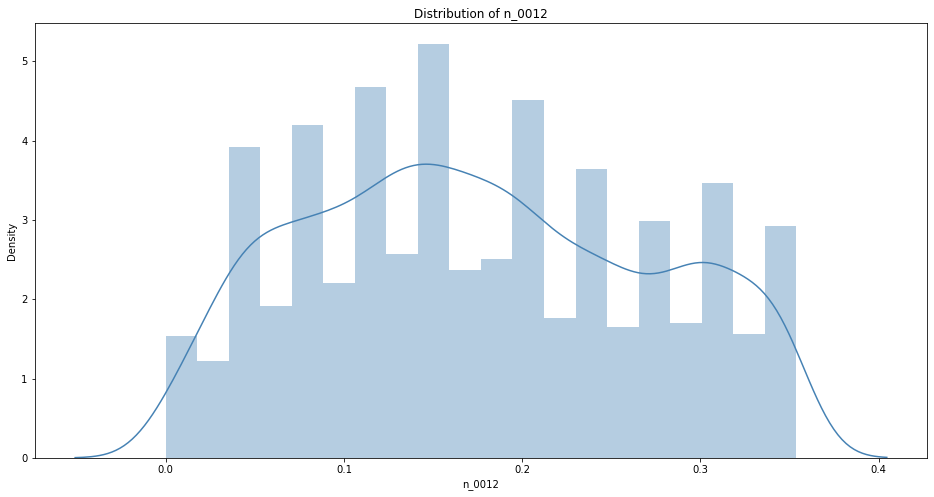

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.set_title('Distribution of ' + n_cols_num_not_bad[3])
ax.set_xlabel(n_cols_num_not_bad[3])

sns.distplot(train[n_cols_num_not_bad[3]], color = 'steelblue')
plt.show()

In [71]:
import math
from statsmodels.distributions.empirical_distribution import ECDF
from statistics import stdev

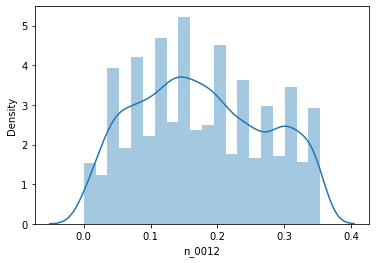

In [105]:
ecdf = ECDF(sns.distplot(train[n_cols_num_not_bad[3]]).get_lines()[0].get_data()[0])

In [106]:
print('P(x<0.1): %.3f' % ecdf(0.1))
print('P(x<0.2): %.3f' % ecdf(0.2))
print('P(x<0.3): %.3f' % ecdf(0.3))

P(x<0.1): 0.330
P(x<0.2): 0.550
P(x<0.3): 0.770


Хммм, вероятности то, вероятно, эта штука и выдает разумные, но как генерировать то новые данные, а не подставлять значения..

<br>Напишем руками написать эмпирическую плотность.

In [107]:
def h_bin(x):
    
    return math.pow(4/3, 1/5) * min(stdev(x), sp.stats.iqr(x) / 1.34) * math.pow(len(x), -1/5)


def gauss_kernel(x):
    
    return 1 / math.sqrt(2 * math.pi) * math.exp(-math.pow(x, 2) / 2)

In [108]:
def empirical_density(sample, values,
                      density_probs):
    density_probs = []
    h = h_bin(sample)
    
    for j in range(len(values)):
        rho_j = 0
        
        for i in range(len(sample)):
            K_j = gauss_kernel((values[j] - sample[i]) / h)
            rho_j += K_j
            
        rho_j = 1 / (len(sample) * h)
        density_probs.append(rho_j)
        
    
    return density_probs

Так, Я ТУТ ПОНЯЛ, что написал эмпирическую плотность, а она возвращает **вероятности**, а мне **значения** нужны, которые я как раз зачем-то передаю 2м аргументом (values). Сейчаааасс.. А когда тогда генерятся выборки из распределений разных?

Вот у меня есть $U(0, 1)$ распределение, как мне выборку из него нагенерить? Не в плане библиотеки, а дайте принцип, метод или формулу. А то я сейчас запутался.. *Вероятности по значениям* то я могу  получать, а вот *значения из распределения* как получать?

Кажется, пора спать. И минус много времени.. уфф

Вот пошел, и через 5 минут понял, что я очень вовремя (сарказм) сформулировал математически задачу, которую затеял:
<br>мне нужно, на самом деле, восстановить функцию распределения, обратить ее и нагенерить по обратной функции выборку,
<br>а я восстановил плотность. Ну, интегралы брать мы уже не будем, как и обращать.

Если честно, по-видимому, тут все столбцы из $[0; 1]$. Такое можно интерпретировать как вероятности, а вероятности я уже умею генерировать.

Еще нагуглил Copula -- апргрейженная моя идея, по-видимому, восстановления плотности и генерации выборки на ее основе.

---

## Gap filling: part III

На самом деле, восстанавливать плотности была не очень здравой идей изначально, но время было, так что мне было не критично.

Но, вообще говоря, еще до этого помнил про такую штуку, как SVD, отложил и благополучно забыл, а теперь опять вспомнил. Какое счастье, а ведь чуть не забыл окончательно!

---

### Singular value decomposition

**Теорема (SVD)**:
<br>Произвольная $l \times n$-матрица представима в виде $$F = VDU^{T}$$
<br>где 
* $l \times n$-матрица $V = (v_1, \ldots, v_n)$ ортонормирована $\left( V^{T} V = E_n \right)$, 
<br>столбцы $v_j$ - собственные векторы матрицы $F F^{T}$;
* $n \times n$-матрицы $D = diag \left( \sqrt{\lambda_n}, \ldots,\sqrt{\lambda_n} \right)$,
<br>$\lambda_j \geq 0$ - собственные значения матриц $F F^{T}$ и $F^{T} F$;
* $n \times n$-матрица $U = (u_1, \ldots, u_n)$ ортонормирована $\left( Г^{T} Г = E_n \right)$, 
<br>столбцы $u_j$ - собственные векторы матрицы $F^{T} F$.

<br>---

<br>Иногда по разным причинам мы можем хотеть обратить матрицу $F$ (например, при поиске решения множественной линейной регрессии методом МНК. Но обратная не всегда хорошо ищется. Например, у нас могу быть линейно-зависимые столбцы, и тогда обратная матрица вообще не считается, либо у нас могут быть коррелированные столбцы или интразинзитивно коррелированы ($\rho(A, B), \ \rho(B, C) > 0$, но $\rho(A, C) < 0$).

Если у нас есть почти линейно зависимые столбцы в матрице $F$, то некоторые с.зн. (собственные значения) матрицы $F F^{T} \rightarrow 0$. Если размах максимального и минимального с.зн. составляет порядки, то возникает вычислительная неустойчивость, решение будет плохо интерпретируемым, а также возникнет эффект переобучения (на обучении метрика классная, а на контроле сасная).

Это можно побороть, например, через введение регуляризации, которая вместе с этим будет понижать нам размерность, тем самым отбирать признаки.

<br>---

<br>**Principal component analysis**:
<br>Но от мультиколлинеарности можно избавляться не только с помощью регуляризации, но и переходом от имеющихся признаков к каким-то новым. Т.е. произойдет изменение признаково пространства, скорее всего, с понижением его размерности.

$f_1(x), \ldots, f_n(x)$ - исходные *числовые* признаки;
<br>$g_1(x), \ldots, g_m(x)$ - новые *числовые* признаки, $m \leq n$
<br>$+$ *требование*: старые признаки должны линейно восстанавливаться по новым как можно точнее на обучающейся выборке $x_1, \ldots, x_l$: 
$$\hat{f_j}(x) = \sum\limits_{s=1}^{m} g_s(x) u_{js}, \ \forall x \in X; \\
\sum\limits_{i=1}^{l} \sum\limits_{j=1}^{n} \left( \hat{f_j}(x_i) - f_j(x_i) \right)^{2} \rightarrow \min\limits_{\{g_s(x_i)\}, \{u_{js}\} }$$
Т.е. хотим так подобрать и новые признаки, и их линейные комбинации, чтобы старые признаки восстанавливались как можно более надежно относительно выбранного функционала качества.

<br>Введенем понятие *матричной нормы Фробениуса* - сумма квадратов всех элементов матрицы. Будем искать преобразование матрицы в новое подпространство относительно данной нормы: $F \in M_{l, n}, \ G \in M_{l, m}, \ m \leq n; \quad U \in M_{n, m}$.
<br>Хотим: $\hat{F} = G U^{T} \approx F$, где $G$ - новые признаки, $U$ - преобразование.

<br>---

<br>**Теорема (PCA)**:
<br>Если $m \leq rk F$, то минимум $\left\lVert G U^{T} - F \right\rVert^{2}$ достигается, когда столбцы $U$ - с.в. матрицы $F^{T} F$, соответствующие $m$ максимальным с.зн. $\lambda_1, \ldots, \lambda_m$, <br>а матрица $G = FU$. При этом:
* матрица $U$ ортонормирована $\left( U^{T} U = E_m \right)$;
* матрица G ортогональна: $G^{T} G = \Lambda = diag(\lambda_1, \ldots, \lambda_m)$;
* $U \Lambda = F^{T} F U; \quad G \Lambda = F F^{T} G$;
* $\left\lVert G U^{T} - F \right\rVert^{2} = \left\lVert F \right\rVert^{2} - tr \Lambda = \sum\limits_{i=m+1}^{n} \lambda_i$.

*Суть*: если возьмем все с.зн. матрицы $F^{T} F$, отсортируем их по убыванию, то первые $m$ из них будут определять наше решение, а последние - ошибку описания.

<br>Если $m = n$, то 
* $\left\lVert G U^{T} - F \right\rVert^{2} = 0$;
* представление $\hat{F} = G U^{T} = F$ точное и совпаддает с SVD при $G = V \sqrt{\Lambda}$: $\ F = V \sqrt{\Lambda} U^{T}$;
* линейное преобразование $U$ работает в обе стороны: $F = G U^{T}; \quad G = F U$.

Поскольку новые признаки некоррелированы $\left( G^{T} G = \Lambda \right)$, преобразование $U$ называется *декоррелирующим* (или преобразование *Каруне-Лоэва*).

<br>---

<br>Будем искать главные компоненты $u_1, \ldots, u_n$, которые удовлетворяют следующим требованиям:
* ортогональность: $\langle u_i, u_j \rangle = 0, \ i != j$;
* нормированность: $\left\lVert u_i \right\rVert^{2} = 1$;
* при проецировании выборки на компоненты $u_1, \ldots, u_m$ получается максимальная дисперсия среди всех возможных способов выбрать $m$ компонент.

Чтобы понизить размерность выборки до $m$, будем проецировать ее на первые $m$ компонент -- из последнего свойства следует, что это оптимальный способ снижения размерности. Дисперсия проецированной выборку будет показывать, как много информации удалось сохранить после понижения размерности -- поэтому требуем максимальной дисперсии от проекций.

Проекция объекта $x_k$ на компоненту $u_i$ вычисляется как $\langle x_k , u_i \rangle$, а проекция всей выборки на эту компоненту - как $X u_i$. Если за $U_m$ обозначить матрицу, столбцы которой равны первым $m$ компонентам, проекция выборки на них будет записываться как $X U_m$, а дисперсия проецированной выборки будет вычисляться как след ковариационной матрицы: $tr U_{m}^{T} X^{T} X U_{m} = \sum\limits_{i=1}^{m} \left\lVert X u_i \right\rVert^{2}.

Начнем с первой компоненты. Сведем все требования к ней в оптимизационную задачу:
$$\left\lVert X u_1 \right\rVert^{2} \rightarrow \max\limits_{u_1} \quad \& \quad
\left\lVert u_1 \right\rVert^{2} = 1$$
Запишем лагранжиан: 
$$L(u_1, \lambda) = \left\lVert X u_1 \right\rVert^{2} + \lambda \left( \left\lVert u_1 \right\rVert^{2} - 1 \right)$$
Продифференцируем и приравняем к нулю:
$$\frac{\partial L}{\partial u_1} = 2 X^{T} X u_1 + 2 \lambda u_1 = 0$$
Отсюда получаем, что $u_1$ должен быть собственным вектором ковариационной матрицы $X^{T} X$. Учтем это и преобразуем функционал:
$$ \left\lVert X u_1 \right\rVert^{2} = u_{1}^{T} X^{T} X u_{1} = \lambda u_{1}^{T} u_{1} = \lambda \rightarrow \max\limits_{u_1}$$
Значит, собственный вектор $u_1$ должен соответствовать максимальному с.зн.

Для следующих компонент к оптимизационной задаче будут добавляться требования ортогональности предыдущим компонентам. Решая эти задачи, мы получим, что главная компонента $u_i$ равна с.в., соответствующему $i$-му с.зн.
<br>После того, как найдены главные компоненты, можно проецировать на них данные. При таком способе новые признаки вычисляются как линейные комбинации старых: $z_{ij}^{'} = \sum\limits_{k=1}^{n} x_{ik}^{'} u_{kj}$.

<br>Если $m$ признаков могут быть выбраны в качестве базиса, а остальные линейное (или почти линейно) через них выражаются, то это будет хорошо видно на спектре (множестве с.зн. матрицы).
<br>Пусть $\lambda_1 \geq \ldots \geq \lambda_n \geq 0$. 
<br>*Эффективная размерность выборки* - это наименьшее целом $m$, при котором
$$E_m = \frac{\left\lVert G U^{T} - F \right\rVert^{2}}{\left\lVert F \right\rVert^{2}} = \frac{\lambda_{m+1} + \cdots + \lambda_n}{\lambda_1 + \cdots + \lambda_n} \leq \epsilon$$

<br>Так же обратим внимание, что SVD-разложение не единственное. Например, если $A$ квадратная и равна единичной матрице, то подойдет любое разложение вида $A = U E U^{T}$, где $U$ - произвольная ортогональная матрица. В данном случае эффект связан с тем, что все сингулярные значения одинаковые. Но, даже если сингулярные значения разные, всегда можно домножать соответствующие столбцы $U$ и $V$ на $-1$, например: 
$$\left( u_1 | \ldots | u_m \right) \Sigma \left( v_1 | \ldots | v_n \right)^{T} = A = 
\left( -u_1 | \ldots | u_m \right) \Sigma \left( -v_1 | \ldots | v_n \right)^{T}$$
Но по модулю вариантов домножения на много $-1$, в случае с различными собственными значениями, разложение определено однозначно. 
<br>На самом деле, достаточно, чтобы $\lambda_m$ и $\lambda_{m+1}$ были различны.

Последний пример так же показывает, что между столбцами $U$ и $V$ есть некоторое условие согласованности. Из-за неоднозначности в разложении надо аккуратно искать все его компоненты: если найденно что-то, например, матрицы $U$ и $\Sigma$, то матрицу $V$ надо искать не абы каким методом.
<br>---

<br>**Еще про SVD и PCA**.

Допустим, что у нас задан случайный вектор $\xi \in {\rm I\!R}^{n}$ и мы для него намерили независимо несколько семплов $x_1, \ldots, x_l \in {\rm I\!R}^{n}$. Первым делом можем оценить математическое ожидание и матрицу ковариации для $\xi$:
$$ {\rm I\!E}\xi = \overline{x} = \frac{x_1 + \cdots + x_l}{l}, \quad \Sigma_0 = \frac{1}{l-1} \left(x_i - \overline{x} \left) \right(x_i - \overline{x} \right)^{t}$$
Составим матрицу семплов $X = \left( x_1 | \ldots | x_l \right)$ и сдвинем каждый семпл на выборочное мат ожидание $Y = X - (\overline{x} | \ldots | \overline{x})$.

Что будет, если применить к данной матрице SVD? Алгоритм SVD начинается с того, что надо диагонализировать матрицу $Y Y^{T}$:
$\ Y Y^{t} = (x_1 - \overline{x})(x_1 - \overline{x}^{t} + \cdots + (x_l - \overline{x})(x_l - \overline{x})^{t}$, что с точностью до коэффициента совпадает с матрицей выборочной ковариации. Значит, диагонализация выборочной ковариации - первый шаг к SVD для $Y$. Интересненько. SVD для Y: $Y = U D V^{T}$.

<br>Но продолжим. 
<br>На SVD можно смотреть вот как: $D = U^{T} Y V$. Т.е. мы стартовали с матрицы из несмещенных семплов Y и теперь с помощью матрицы $U$ пытаемся поменять координаты в пространстве ${\rm I\!R}^{n}$, где живут наши семплы, а с помощью матрицы $V$ пытаемся комбинировать наши семплы между собой. Зачастую операция комбинирования семплов не очень физически/геометрически осмысленна, поэтому давайте ее проигнорируем и рассмотрим равенство $U^{T} Y = D V^{T}$. Тогда вот какой смысл у написанного. Мы стартовали с Y. Потом выбрали для выборочной матрицы ковариации $\Sigma_0$ с.в-ы ортонормированные и сложили их в матрицу $U = \left( u_1 | \ldots | u_n \right)$. Далее привели матрицу $Sigma_0$ к главным осям, т.е. сделали замену стандартного базиса на базис $u_1, \ldots, u_n$. При этом координаты наших семплов как раз изменятся по правило $ Y \to U^{T} Y = D V^{T} $. Если расписать это равенство в виде матриц, то увидим, что у ортогональной матрицы $V^{T}$ отрезали верхнюю часть. Так как матрица $V$ была ортогональна, то интуитивно, ее координаты вносят одинаковый вклад в итоговую матрицу. Однако, после этого мы каждую координату домножили на весовой коэффициент $\lambda_j$, а какие-то из последних даже на $0$. Таким образом после смены координат для несмещенных семплов $Y \to U^{T} Y$ мы отсортировали координаты по убыванию по их важности, где $\lambda_j$ означает вес важности координаты. При этом мы видим, если расписать в матричном виде, что последние координаты мы вообще можем проигнорировать, ибо они стали нулевыми. Кромет ого, мы еще можем проигнорировать координаты с малыми $\lambda_j$.

По другому еще можно сказать так. Мы нашли, что все наши семплы жили в подпространстве ${\rm I\!R}^{m}$ и после поворота пространства, отрезав лишние координаты, мы можем считать, что наши семплы имеют определенный специфичный вид: $D V^{T}$, где $D \in M_{m, m}, \ V \in M_{n, m}$.

<br>И последнее.
<br>Пусть $F \in M_{n, m}$ и ей в соответствие поставлен линейный оператор, также обозначаемый $F$. По SVD: $F = U \Lambda V^{T}$ -- это можно переформулировать в геометрических терминах. Линейный оператор, отобрадающий элементы пространства ${\rm I\!R}^{n}$ в элементы пространства ${\rm I\!R}^{m}$ представим в виде последовательно выполняемых линейных операций *вращения, растяжения и вращения*. Число ненулевых элементов на диагонали матрицы $\Lambda$ есть фактическая размерность матрицы $F$.

При этом по растяжением здесь имеется в виду диагональный оператор -- растяжение вдоль стандартного базиса (самосопряженный - вдоль любогго ортонормированного), причем каждую ось тянем со своим коэффициентом. SVD выделяет взаимосвязанные оси и коэффициенты их зависимостей друг с другом. При этом оси выделены явно в виде столбцов $U$ и $V$. А сингулярные значения матрицы $F$ - длины осей эллипсоида, заданного множеством $\{ A x = \left\lVert x \right\rVert^{2} \}$. 
<br>*Если просто раскладывать на вращение-растяжение, то это полярное разложение, и оно только для квадратных (в отличие от SVD) матриц.*

---

За 5 минут очень легко нашелся пакет в R'е для зафилливания библиотечным путем через SVD, а на Python довольно грустно, кажется. <br>Поэтому переключимся временно на язык R.

<br>Здесь подключим зафиллинный уже train, а код на R'е будет в отдельном файле.

In [ ]:
train.to_csv(r'\Data\missing_train.csv',
             index=False)

train_filled = pd.read_csv(r'\Data\filled_train.csv')

Так, ладно. У меня проблема с пакетами: то моя версия слишком старая, то теперь слишком новая, то хочет выделить 21000 Gb памяти. Вернемся в Python..

---

Как гласит теория, сначала вычтем средние столбцов.

In [73]:
### Нужно ли?

In [78]:
### И, по сути, этот топик стоит перенести в другое место, зафиллить через knn и обозвать что-то в духе про избавление от корреляций

In [74]:
train_svd = train.copy()
test_svd = test.copy()

Среднее есть у каждого столбца, хорошо.

In [75]:
print(train_svd.mean(axis=0).isna().sum())
print(test_svd.mean(axis=0).isna().sum())

0
0


In [76]:
train_svd = train_svd - train_svd.mean(axis=0)
test_svd = test_svd - test_svd.mean(axis=0)

In [77]:
sorted(train.columns) == sorted(train_svd.columns)

True

Начнем с выкидывания полностью пустых колонок и зафилливания mean'ом (или median) пропусков.

In [79]:
mask = train_svd.isnull().sum() == 8000
cols_full_na = list(train_svd.columns[mask])

len(cols_full_na)

911

In [80]:
mask = test_svd.isnull().sum() == 8000
cols_full_na_test = list(test_svd.columns[mask])

len(cols_full_na_test)

0

In [81]:
train_svd = train_svd.drop(cols_full_na, axis=1)
train_svd.shape

(8000, 277)

In [82]:
numeric_cols = list(train_svd.select_dtypes(include=numerics).columns)
string_cols = list(train_svd.select_dtypes(include='object').columns)

print(len(numeric_cols), len(string_cols))

277 0


In [83]:
train_numeric = train_svd[numeric_cols].copy()

for col in train_numeric.columns:
    train_numeric[col] = train_numeric[col].fillna(train_numeric[col].median())

Ищем SVD для нашей почищенной матрицы.

In [84]:
U_numeric, s_numeric, Vh_numeric = sp.linalg.svd(train_numeric)

In [85]:
U_numeric.shape

(8000, 8000)

In [86]:
Sigma = np.zeros((train_numeric.shape[0], train_numeric.shape[1]))

Sigma[:train_numeric.shape[1], :train_numeric.shape[1]] = np.diag(s_numeric)

train_numeric_matr = U_numeric.dot(Sigma.dot(Vh_numeric))
print(train_numeric_matr)

[[-1.83092148e-13  4.66372116e-02 -1.54856811e-02 ... -2.09090909e-01
   4.16666667e-01 -2.82637954e-01]
 [-1.83235154e-13  4.66372116e-02 -9.63772790e-03 ... -2.09090909e-01
   4.16666667e-01 -2.82637954e-01]
 [-1.83298906e-13  4.66372116e-02 -1.64603400e-02 ... -2.09090909e-01
   4.16666667e-01 -2.82637954e-01]
 ...
 [-1.83444405e-13  2.49018164e-01 -7.47181930e-03 ... -2.09090909e-01
   4.16666667e-01 -2.82637954e-01]
 [-1.83440719e-13  4.66372116e-02  6.17340487e-03 ... -2.09090909e-01
   4.16666667e-01  3.71736205e+00]
 [-1.83544369e-13  1.06161021e-01  8.55590433e-03 ... -2.09090909e-01
   4.16666667e-01 -2.82637954e-01]]


In [87]:
train_numeric.head(3)

n_0000    n_0001    n_0002   n_0003   n_0004    n_0005    n_0006  \
0 -1.833533e-13  0.046637 -0.015486 -0.05513 -0.06954 -0.027560  0.006825   
1 -1.833533e-13  0.046637 -0.009638 -0.05513 -0.06954 -0.080191  0.006825   
2 -1.833533e-13  0.046637 -0.016460 -0.05513 -0.06954 -0.053876  0.006825   

     n_0007    n_0009    n_0010  ...   o_0314    o_0315    o_0316    o_0319  \
0 -0.012012 -0.079448 -0.061538  ... -0.00354 -0.086978 -0.080605  0.348733   
1 -0.012012 -0.079448 -0.061538  ... -0.00354 -0.086978 -5.080605  0.348733   
2 -0.012012 -0.079448 -0.061538  ... -0.00354 -0.086978 -0.080605  0.348733   

   o_0321    o_0322    o_0323    o_0324    o_0325    o_0326  
0     0.0  0.324176 -0.009445 -0.209091  0.416667 -0.282638  
1     0.0  0.324176 -0.009445 -0.209091  0.416667 -0.282638  
2     0.0  0.324176 -0.009445 -0.209091  0.416667 -0.282638  

[3 rows x 277 columns]

Чорт, ```sp.linalg```, ```np.linalg``` не вычисляют SVD на размерности ниже.
<br>sklearn: 'Here we go again'.

In [88]:
svd_numeric = TruncatedSVD(n_components=40, n_iter=10, random_state=42)  ## Тут, по сути, эксперимент, на практике, понятно, n_components определяются, например, через GridSearchCV

train_numeric_svd = svd_numeric.fit_transform(train_numeric)

In [89]:
train_numeric_svd

array([[-1.05022566e+02,  2.30581368e+01,  1.92394639e+01, ...,
        -6.12074041e-01, -5.65366703e-01, -5.07784912e-01],
       [-9.48719543e+01,  1.52767872e+01,  1.48154299e+01, ...,
         2.75800506e+00,  8.72055094e-01,  1.58766710e-01],
       [ 6.73795600e+01,  9.73444457e+00,  1.23576159e+01, ...,
        -1.03468800e+00, -8.77175877e-02, -2.93123478e-01],
       ...,
       [-1.70725055e+02, -2.54216193e+00,  7.25332477e+00, ...,
         1.93420675e+00,  6.27289507e-03,  4.88037833e-01],
       [ 1.29506693e+02, -8.34344993e+00,  6.99372677e+00, ...,
        -1.30830467e+00,  1.60798483e+00,  4.95202789e-01],
       [ 7.34588708e+01, -9.99816839e+00,  6.17542692e+00, ...,
         2.52403345e-01,  9.22489269e-01, -2.35657611e-01]])

In [90]:
train_numeric_svd.shape

(8000, 40)

По всей видимости, нам вернулась разряженная матрица (потому что shape != (8000, 277).

In [ ]:
## Сделать svd для string столбцов, конверченных в numeric

---

**Еще чуть-чуть в глубь теории SVD**

Вкратце еще раз, как работает низкоранговое приближение $\left\lVert A - B \right\rVert^{2} \rightarrow \min\limits_{B}$.
<br>Сначала находим через SVD $A = U S V^{T}$. Потом надо найти матрицу $B$ ранга $m \leq n$, где $rk A = n$. Тогда в матрице $S$ останутся только первые наибольшие $m$ сингулярных значений, а остальные занулятся. Т.е. получу $S_m$. В итоге $B = U S_m V^{T}$. И если $A \in M_{p, q}$, то B тоже будет $\in M_{p, q}$.

<br>Возвращаясь к тому, что я хочу сделать: а именно, зафиллить miss'ы у $A$. Т.е. в теории хочу получить такую матрицу $B$, что где у $A$ miss'ов нет, то значения $A$ и $B$ совпадают, а где miss'ы есть, то значения из $B$ подставить взамен miss'ов $A$. 
<br>Но проблема в том, что низкоранговое SVD дает мне какую-то матрицу $B$, в том плане, что на ней лишь достигается $\min \left\lVert A - B \right\rVert^{2}$, но значения вообще могут со значениями $A$ не пересекаться. Информация из $A$ сохраняется только такая, "спектральная". В итоге это дело может невообразимо изменить исходное признаковое пространство. Поэтому, например, для рекомендация нам все равно, если мы от $A$ ни оставили ни одного исходного значения на том же месте, но для заполнения miss'ов нам абсолютно не все равно.

<br>Это я к чему. ЧЕРЕЗ ПРОСТО SVD MISS'Ы НЕ ЗАПОЛНИТЬ.

--
<br>Вообще говоря, возвращаясь к теории, при различных сингулярных (даже только при $m$, $m+1$) значения низкоранговое приближение почти единственное. 

Но ситуацию это не спасает по той причине, что SVD НЕ может работать с матрицами, содержащими NAs. В итоге, мы в лучше случае восстановим лишь почти что матрицу $\hat{A}$, которую уже заполнили mean'ми. Но нам нужно ее заполнить, а не восстановить mean'ированную с отличием лишь в знаках.
<br>--

На самом деле, для матриц с NA есть улучшение вышеизложенного алгоритма низкорангового приближение, а именно ALS-algorithm.

### Model I.3

In [92]:
train_numeric_svd = pd.DataFrame(train_numeric_svd)
train_numeric_svd.head()

0          1          2          3          4         5         6   \
0 -105.022566  23.058137  19.239464   2.180831  -7.366597  2.245112  4.026876   
1  -94.871954  15.276787  14.815430   4.153140  -5.318335  6.151623  1.577718   
2   67.379560   9.734445  12.357616  17.438591  10.531677  5.576543 -3.940953   
3   85.379002  -6.547249   6.199787 -10.887203  -3.754199 -6.176078  1.676168   
4  -41.727540   9.275072 -13.013373  -0.919379 -13.135489  0.254270 -9.091886   

          7         8          9   ...        30        31        32  \
0  -5.878325 -2.561963  -0.181549  ... -1.187305  0.196728  0.250486   
1  -1.574206  8.340478   0.948025  ... -2.195974 -0.041918 -0.002824   
2  11.378340 -4.381605  -5.478885  ... -1.293603 -0.664398 -0.654416   
3   5.928121  2.265912  -3.709220  ... -3.916411  0.284703 -0.652151   
4  -1.016842  4.085985 -10.049342  ... -6.418954  3.820510  4.146757   

         33        34        35        36        37        38        39  
0  0.487346  0.965864 -0.392535 -0.035739 -0.612074 -0.565367 -0.507785  
1  2.621978 -0.243463 -0.399411 -5.760782  2.758005  0.872055  0.158767  
2 -0.835094  0.881834 -2.314980 -0.739458 -1.034688 -0.087718 -0.293123  
3 -0.356021 -1.284589 -0.631640 -2.695679  0.925091 -0.210578 -0.061376  
4 -0.764124  3.821018  0.968495  0.178175  4.335574  1.004221  0.896739  

[5 rows x 40 columns]

In [ ]:
# тут про train_string_svd

In [ ]:
str_cols = train_zeros.select_dtypes(include='object').columns

train_zeros_ohe = OneHotEncoder(handle_unknown="ignore").fit_transform(train_zeros[str_cols])
train_zeros_ohe = pd.DataFrame.sparse.from_spmatrix(train_zeros_ohe)
train_zeros_ohe.shape

In [ ]:
train_zeros = train_zeros.select_dtypes(include=numerics)
train_zeros = pd.concat([train_zeros, train_zeros_ohe], axis=1, join="inner")
train_zeros.shape

In [ ]:
# Для следующего бы, конечно, уже пора функцию завести, а то не читаемо

In [ ]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'CB': cbc
}
predicts = []

In [ ]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train_zeros,
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

Лучшее:
<br>LR test multiclass LogLoss = 0.3255
<br>CB test multiclass LogLoss = 0.2889

----

## Gap filling: part IV

Давайте из простого заодно проверим kNN, прежде чем переходить к ALS-алгоритму.

In [59]:
from sklearn.impute import KNNImputer

In [60]:
numeric_cols = list(train.select_dtypes(include=numerics).columns)
string_cols = list(train.select_dtypes(include='object').columns)

print(len(numeric_cols), len(string_cols))

277 911


In [61]:
mask = train[numeric_cols].isnull().sum() == 0
numeric_good_cols = list(train[numeric_cols].columns[mask])

mask = (train[numeric_cols].isnull().sum() < 1029) & (train[numeric_cols].isnull().sum() > 0)
numeric_almost_good_cols = list(train[numeric_cols].columns[mask])

mask = (train[numeric_cols].isnull().sum() > 1028) & (train[numeric_cols].isnull().sum() < 8000)
numeric_not_bad_cols = list(train[numeric_cols].columns[mask])

In [62]:
print(len(numeric_cols))
print()
print(len(numeric_good_cols))
print(len(numeric_almost_good_cols))
print(len(numeric_not_bad_cols))

277

6
10
261


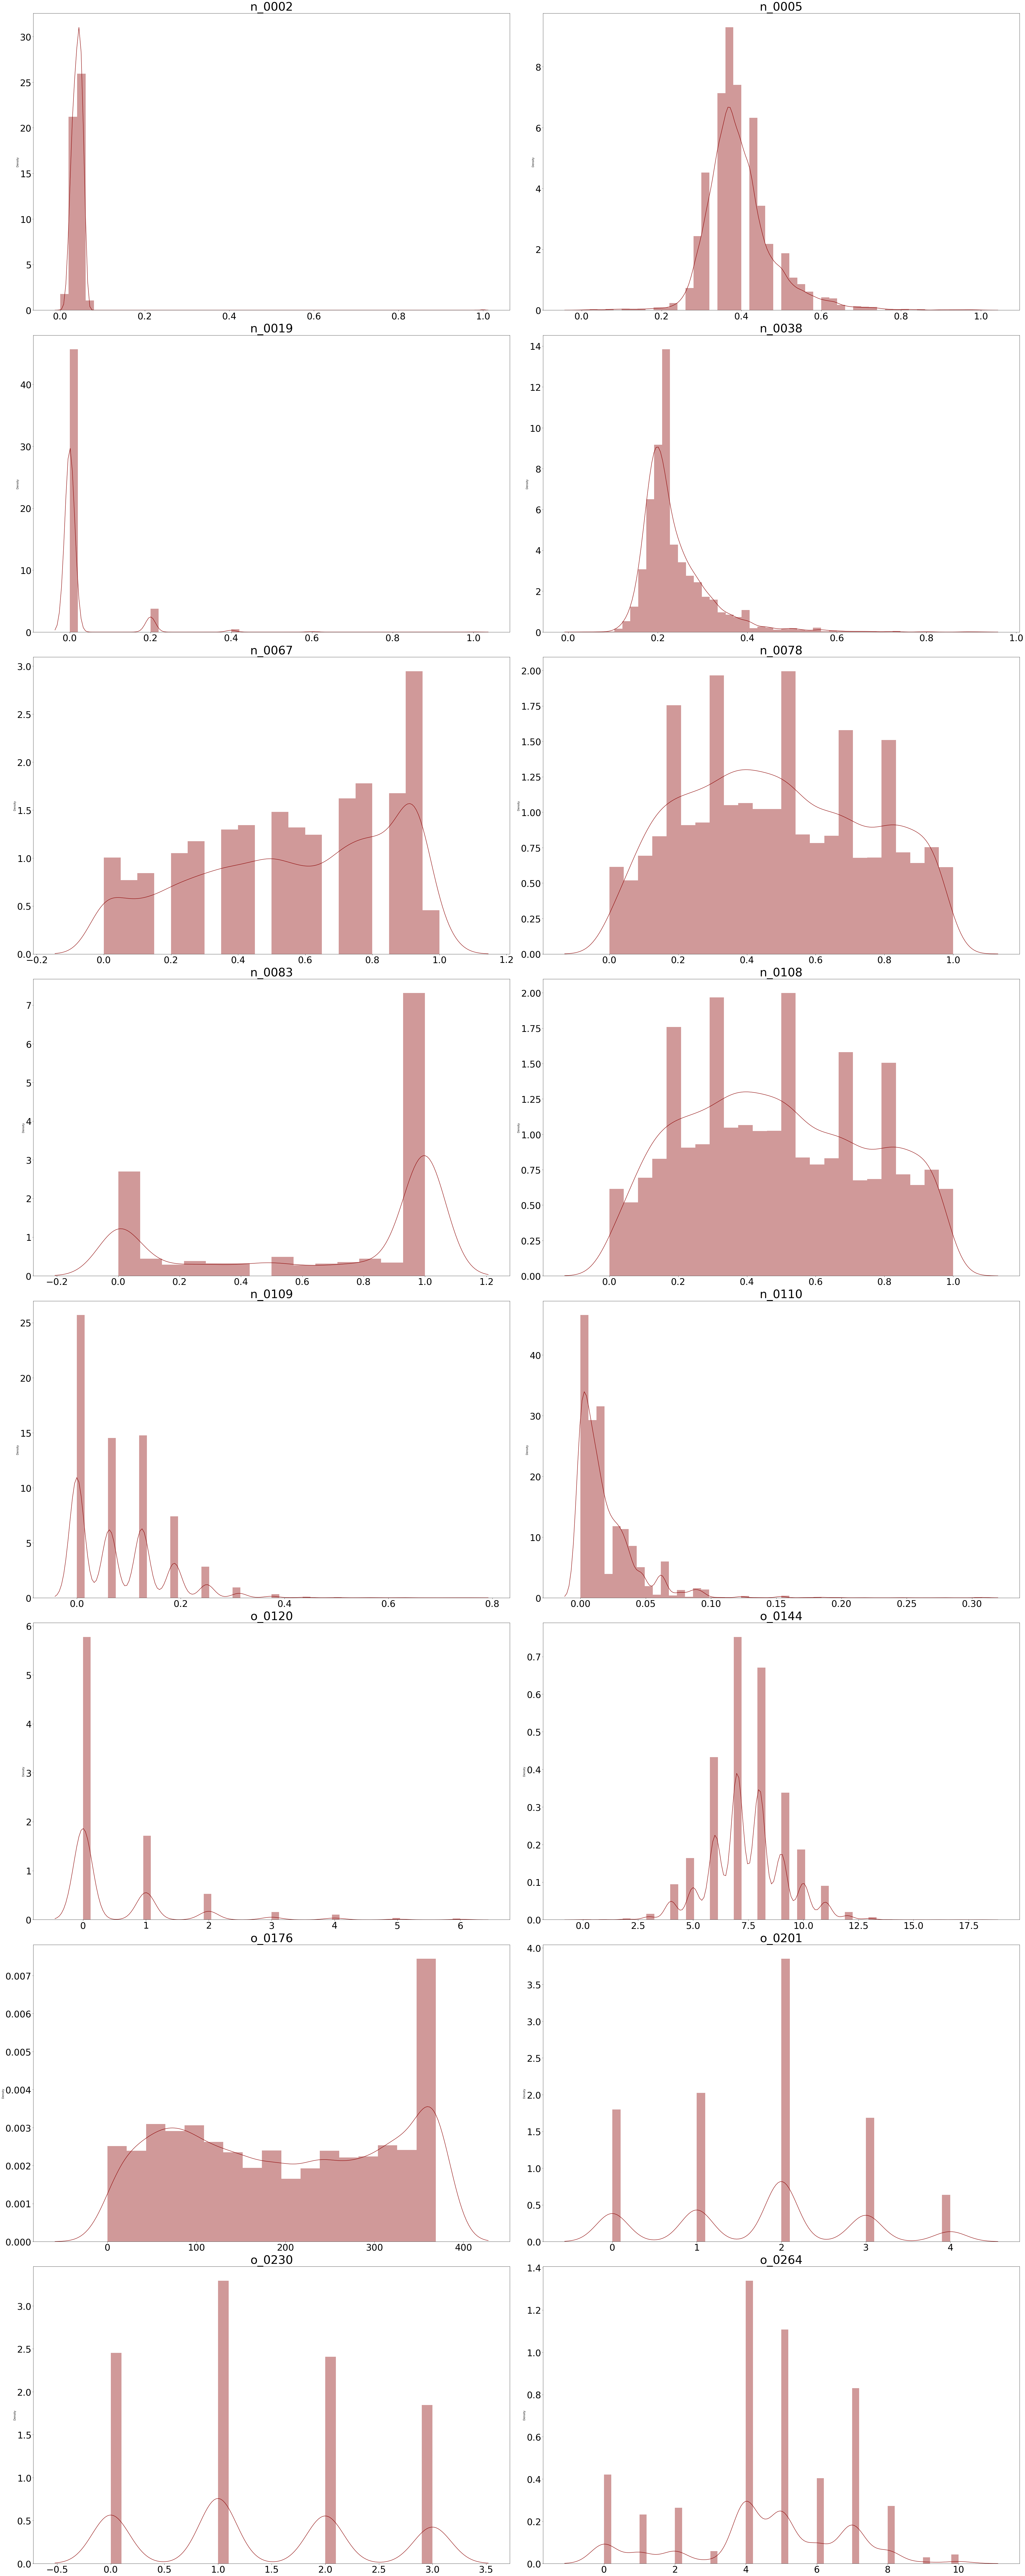

In [68]:
cols_for_plot = numeric_good_cols + numeric_almost_good_cols
cols_for_plot.sort()


fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (55, 150))

for ax, column in zip(axes.flatten(), train[cols_for_plot].columns):
    sns.distplot(train[column], ax = ax, color = 'darkred')
    
    ax.set_title(column, fontsize = 45)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
    
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

In [69]:
%%time
knn_numeric_fill = numeric_almost_good_cols + numeric_not_bad_cols

train_numeric_knn = train[knn_numeric_fill].copy()
tr_cols = list(train_numeric_knn.columns)

imputer = KNNImputer(n_neighbors=6, weights='distance', metric='nan_euclidean')
train_numeric_knn = imputer.fit_transform(train_numeric_knn)

train_numeric_knn = pd.DataFrame(data=train_numeric_knn, columns=tr_cols)
train_numeric_knn.head()

Wall time: 1min 12s


n_0002    n_0005  n_0019    n_0038    n_0083    n_0110  o_0120  o_0144  \
0  0.025449  0.368421     0.0  0.193548  1.000000  0.009231     0.0     8.0   
1  0.031297  0.315789     0.0  0.177419  0.000000  0.009231     0.0     8.0   
2  0.024475  0.342105     0.0  0.290323  1.000000  0.006154     0.0     7.0   
3  0.041694  0.447368     0.0  0.370968  0.833333  0.000000     2.0     8.0   
4  0.038120  0.315789     0.0  0.177419  0.666667  0.015385     0.0     8.0   

   o_0201  o_0230  ...  o_0314  o_0315    o_0316    o_0319    o_0321  \
0     0.0     1.0  ...     0.0     0.0  3.595414  6.924297  1.261390   
1     2.0     2.0  ...     0.0     0.0  0.000000  6.460700  1.134780   
2     1.0     0.0  ...     0.0     0.0  6.832661  4.930598  1.085414   
3     1.0     0.0  ...     0.0     0.0  6.278400  4.517391  0.581190   
4     2.0     1.0  ...     0.0     0.0  6.464583  5.244600  0.693781   

      o_0322  o_0323    o_0324    o_0325    o_0326  
0  19.858683     0.0  1.723561  0.339476  5.788092  
1  19.256544     0.0  1.784041  0.496378  4.321955  
2  19.065640     0.0  1.509850  0.556376  3.558836  
3  19.494139     0.0  1.533688  0.564914  5.933225  
4  19.218365     0.0  1.815058  0.528307  4.694341  

[5 rows x 271 columns]

In [63]:
mask = train[string_cols].isnull().sum() == 0
string_good_cols = list(train[string_cols].columns[mask])

mask = (train[string_cols].isnull().sum() < 1050) & (train[string_cols].isnull().sum() > 0)
string_almost_good_cols = list(train[string_cols].columns[mask])

mask = (train[string_cols].isnull().sum() > 1049) & (train[string_cols].isnull().sum() < 8000)
string_not_bad_cols = list(train[string_cols].columns[mask])

In [64]:
print(len(string_cols))
print()
print(len(string_good_cols))
print(len(string_almost_good_cols))
print(len(string_not_bad_cols))

911

19
50
842


In [72]:
%%time
knn_string_fill = string_almost_good_cols + string_not_bad_cols
train_string_knn = train[knn_string_fill].copy()
tr_cols = list(train_string_knn.columns)

train_string_knn = train_string_knn.fillna('')
for col in train_string_knn.columns:
    train_string_knn[col] = LabelEncoder().fit_transform(train_string_knn[col])

imputer = KNNImputer(n_neighbors=6, weights='distance', metric='nan_euclidean')
train_string_knn = imputer.fit_transform(train_string_knn)

train_string_knn = pd.DataFrame(data=train_string_knn, columns=tr_cols)
train_string_knn.head()

Wall time: 1.55 s


c_0368  c_0401  c_0426  c_0444  c_0456  c_0461  c_0543  c_0544  c_0554  \
0     2.0     1.0     1.0     1.0     1.0     1.0     2.0     1.0     1.0   
1     2.0     1.0     2.0     1.0     1.0     1.0     2.0     5.0     1.0   
2     2.0     1.0     1.0     1.0     1.0     2.0     3.0     3.0     1.0   
3     2.0     1.0     1.0     1.0     1.0     1.0     3.0     3.0     1.0   
4     2.0     1.0     2.0     1.0     1.0     2.0     3.0     1.0     1.0   

   c_0582  ...  c_1365  c_1366  c_1367  c_1369  c_1370  c_1373  c_1374  \
0     1.0  ...     0.0     0.0     0.0     0.0     0.0     0.0    17.0   
1     6.0  ...     2.0     0.0     0.0     0.0     1.0     0.0     0.0   
2     1.0  ...     0.0     0.0     0.0     0.0     1.0     0.0     2.0   
3     1.0  ...     2.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     6.0  ...     2.0     0.0     0.0     0.0     2.0     0.0     1.0   

   c_1375  c_1376  c_1377  
0     0.0     0.0     0.0  
1     0.0     0.0     0.0  
2     0.0     0.0     0.0  
3     0.0     0.0     0.0  
4     0.0     0.0     0.0  

[5 rows x 892 columns]

In [74]:
print(train_numeric_knn.shape)
print(train_string_knn.shape)

(8000, 271)
(8000, 892)


In [75]:
train_knn_ohe = OneHotEncoder(handle_unknown="ignore").fit_transform(train_string_knn)
train_knn_ohe = pd.DataFrame.sparse.from_spmatrix(train_knn_ohe)
train_knn_ohe.shape

(8000, 6110)

In [76]:
train_knn = pd.concat([train_numeric_knn, train_knn_ohe], axis=1, join="inner")
train_knn.shape

(8000, 6381)

---

## Model I.3

In [77]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'CB': cbc
}
predicts = []

In [78]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train_knn,
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.3786
LR 1 test logloss = 0.5527
LR 2 test logloss = 0.5250
LR 3 test logloss = 0.0592
LR 4 test logloss = 0.2123
LR 5 test logloss = 0.0922
LR 6 test logloss = 0.1861
LR 7 test logloss = 0.4825
LR 8 test logloss = 0.0943
LR 9 test logloss = 0.3733
LR 10 test logloss = 0.4770
LR 11 test logloss = 0.1143
LR 12 test logloss = 0.1144
LR 13 test logloss = 0.3564

LR took 3.8e+02 s
---------------
LR test multiclass LogLoss = 0.2870


CB 0 test logloss = 0.3361
CB 1 test logloss = 0.5034
CB 2 test logloss = 0.5035
CB 3 test logloss = 0.0275
CB 4 test logloss = 0.1656
CB 5 test logloss = 0.0587
CB 6 test logloss = 0.1741
CB 7 test logloss = 0.4454
CB 8 test logloss = 0.0547
CB 9 test logloss = 0.3587
CB 10 test logloss = 0.4604
CB 11 test logloss = 0.0884
CB 12 test logloss = 0.0770
CB 13 test logloss = 0.3424

CB took 3.5e+03 s
---------------
CB test multiclass LogLoss = 0.2569




Лучшее:
<br>LR test multiclass LogLoss = 0.3107
<br>CB test multiclass LogLoss = 0.2889

Вот, посмотрим, насколько ALS будет круче kNN :)

---

## Gap filling: part V

Вообще говоря, интересно, что здесь используется, по сути, алгоритм из коллаборативной фильтрации. Хотя я понимаю, что правильнее сказать, что это в ней используется алгоритм из матричных разложений.

---

### Alternating Least Square

Хотим провести для матрицы $A$ разложение (matrix factorization) через матрицу $X$ или низкоранговое приближение $\left\lVert A - X \right\rVert_{*}^{*} \rightarrow \min\limits_{X}$, чтобы это минимизировало некоторый функционал потерь на матрицах $rk(X) \leq r \leq \min\{m, n\}$. Например: $J(X) = \left\lVert A - X \right\rVert_{F}^{2} + \lambda \left\lVert X \right\rVert_{F}^{2}, \ Q: {\rm I\!R}^{m \times n} \rightarrow {\rm I\!R}$.

<br>Для задачи о наилучшем приближении матрицы A ранга $r$ уже знаем, что SVD является лучшим приближнием A по нормам фробениусовой, $\ell_{2}$ и, <br>на самом деле, по любой унитарно-инвариантной норме.
<br>// *Норма на* $\mathbb{C}^{m \times n}$ *является унитарно-инвариантной, если $\left\lVert U A V \right\rVert$ = $\left\lVert A \right\rVert \ \ \forall \ \text{унитарных} \ U \in \mathbb{C}^{m \times m}, \ V \in \mathbb{C}^{n \times n} \ 
\& \ \forall A \in \mathbb{C}^{m \times n}$.*
<br>// *$U \in \mathbb{C}^{m \times n}$ - унитарная матрица, если $U U^{*} = E$ или (что тоже самое) $U^{-1} = U^{*} = \overline{U^{T}}$.*

Но на практике функционалы могут быть другими (и более сложными). Например: 
$$ Q(X) = \left\lVert P_{\Omega} \circ \left(A - X\right) \right\rVert_{F}^{2}, \quad  P_{\Omega} = I_{(i, j) \in \Omega} \quad \circ - \text{поэлементное произведение} $$
По сути, матрица $A$ известна только в некоторых позициях и там происходит умножение на $1$, а где не известна, умножение на $0$, в итоге фробениусовая норма не портится. Получаем задачу восстановления матрицы $A$ по наблюдаемым элементам: *matrix completion problem*.

Для $A = \begin{pmatrix} \text{NA} & \text{NA} & 5 \\ 3 & 2 & 2 \\ 5 & \text{NA} & 5 \end{pmatrix}$ имеем 
$P_{\Omega} = \begin{pmatrix} 0 & 0 & 1 \\ 1 & 1 & 1 \\ 1 & 0 & 1 \end{pmatrix}$.

<br>Вспомним, что для всякой матрицы $X$ порядка $m \times n$ ранга $r$ существует представление в виде произведения двух матриц $U$ и $V^T$, <br>где $U$ порядка $m \times r$, $V^{T}$ порядка $r \times n$, и их ранги равны $r$ (*скелетное разложение*).

В итоге, при выбранной норме функционала, приходим к следующей постановке задачи:
$$J \left( U, \ V \right) = \left\lVert A - U V^{T} \right\rVert_2 + \lambda \left( \left\lVert U \right\rVert_2 + \left\lVert V \right\rVert_2 \right) \rightarrow \min\limits_{U, \ V}$$
Первое слагаемое в чистом виде MSE - мера расстояния между исходной матрицей $A$ и ее аппроксимацией; второе - regularization term.
<br>Первое слагаемое есть функция затрат (потерь) $Q$: 
$$Q \left( U, \ V \right) = \left\lVert A - U V^{T} \right\rVert_2 = \sum\limits_{i, j} \left( A_{ij} - U_i V_j^T \right)$$
Такой объект не является выпуклым из-за члена $U_i V_j^{T}$; даже больше, такая задача является NP-сложной. Здесь можно использовать градиентный спуск в качестве приблизительного подхода, однако он оказывается медленным и требует большого количества итераций.
<br>Обратим внимание, что если мы зафиксируем набор переменных $V$ и будем рассматривать их как константы, то функционал будет выпуклой функцией $U$ и наоборот. Т.е. будем получать простую задача линейной регрессии, которая решается по методу наименьших квадратов (ordinary least squares). 
<br>// *Для $\left\lVert y - X \beta \right\rVert, \ y, \ X \ \text{- fix}$,  имеем: $\beta = \left(X^{T} X\right)^{-1} X^{T} y$.*

<br>**Идея**: по сути, ALS делает это же, но только в несколько этапов. Такой вот двухшаговый итерационный процесс: сначала фиксируется $V$ и решается задача оптимизации по $U$, затем фиксируется найденное $U$ и решается задача по $V$. Так как решение МНК (OLS) единственное и гарантирует минимум MSE, на каждом шаге функционал качества $J$ может либо убывать, либо оставаться неизменным, но никогда возрастать. Чередование двух шагов гарантирует не увеличение функции потерь $Q$, пока не сойдется, но, правда, только к локальному минимуму. Все это также очень зависит от начальных приближений $U_0$, $V_0$ в этом итерационном процессе.

<br>---

<br>**Алгоритм (ALS vanilla; 1994, Paatero, Tapper)**:
<br>Пусть $U_0, V_0$ - начальное приближение (например, случайные матрицы). Тогда 
$$U_{k+1} = arg\,\min_{U} Q(UV_{k}^{T}) \\
V_{k+1} = arg\,\min_{V} Q(U_{k+1} V^{T})$$

*Замечание*: минимизируя эти функционалы по $U$ и по $V$, может так произойти (особенно, если решение имеет rk $< r$), что столбцы $U$ или $V$ будут становиться все более и более мультиколлинеарными, что будет приводить к проблемам численной оптимизации.

Давайте дополнительно хотеть ортоганолизировать столбцы $U$ и $V$, чтобы не возникало мультиколлинеарности.

<br>**Алгоритм (ALS with orthogonalization)**:
<br>Пусть $U_0, V_0$ - начальное приближение (например, случайные матрицы). Тогда 
$$\hat{U}_{k+1} = arg\,\min_{U} Q(U V_k^T) \\
\hat{U}_{k+1} = Q_{k+1} R_{k+1} \quad \text{// QR-разложение, ортогонализуем //} \\
\hat{V}_{k+1} = arg\,\min_{V} Q(Q_{k+1} R_{k+1} V^T) = arg\,\min_{V} Q(Q_{k+1} \hat{V}^{T}) \\
\hat{V}_{k+1} = Q^{k+1} R^{k+1}$$ 
В итоге имеем:
$$U_{k+1} = Q_{k+1} \left(R^{k+1}\right)^{T} \\
V_{k+1} = Q^{k+1}$$
<br>При QR-разложении в вещественном случае матрица $Q$ будет ортогональной.

<br>Вообще говоря, еще у нас есть член регуляризации. Но его на каждом шаге можно разбить на подслагаемые и решать задачу оптимизации относительно новых функций потерь.

**Алгоритм (ALS with regularization)**:
<br>Пусть $U_0, V_0$ - начальное приближение (например, случайные матрицы). Тогда 
$$\forall U_i \ \ J(U_i) = \left\lVert A_i - U_i V^{T} \right\rVert_2 + \lambda \left\lVert U_i \right\rVert_2 \\
\forall V_j \ \ J(V_j) = \left\lVert A_j - U V_{j}^{T} \right\rVert_2 + \lambda \left\lVert V_j \right\rVert_2$$
По OLS имеем:
$$U_i^* = \left( V^T V + \lambda E \right)^{-1} V^{T} A_{i} \\
V_j^* = \left( U^T U + \lambda E \right)^{-1} U^{T} A_{j}$$

*Замечание*: так как $U_i^*$ ($V_j^*$) не зависит напрямую (но через $V$ ($U$)) от $U_{j \neq i}$ ($V_{i \neq j}$), то этот процесс распараллеливается.
<br>---

<br>**QR-разложение**:
<br>Матрица $A$ размера $n \times n$ с комплексными элементами может быть представлена в виде:
$$A = Q R$$
где $Q$ — унитарная матрица размера $n \times n$, а $R$ — верхнетреугольная матрица размера $n \times n$.

*Замечания*: 
<br>$1$. Если $A$ - квадратная невырожденная матрица, то существует единственное QR-разложение, если наложить дополнительное условие, что элементы на диагонали матрицы $R$ должны быть положительными вещественными числами.
<br>$2$. Если у $A$ первые $k$ столбцов линейно независимы, тогда первые $k$ столбцов матрицы $Q$ образуют ортогональный базис для этих столбцов матрицы $A$. 
<br>$3$. Тот факт, что любой столбец $K$ из А зависит только от первых $k$ столбцов $Q$ отвечает за треугольную форму $R$.

<br>---

<br>Когда мы хотим заполнить пропущенные значения при помощи матричного разложения, следует изменить функционал потерь:
$$\left\lVert P_{\Omega} \circ \left(A - U V^T\right) \right\rVert_{F}^{2} + \lambda \left( \left\lVert U \right\rVert_{F}^{2} + \left\lVert V \right\rVert_{F}^{2} \right) = \sum\limits_{i, j} p_{i j} \left(A_{i j} - U_i V_j^T \right)^{2} + \lambda \left( \left\lVert U \right\rVert_{F}^{2} + \left\lVert V \right\rVert_{F}^{2} \right)$$
где $p_{i j} = I_{A_{i j} - \text{известно}}$. Тогда решением МНК будет:
$$U_i^* = \left( V^T p_i V + \lambda E \right)^{-1} V^{T} p_i A_{i} \\
V_j^* = \left( U^T p_j U + \lambda E \right)^{-1} U^{T} p_j A_{j}$$

$P_{\Omega}$ не зануляет неизвестные элементы $A$. Мы лишь говорим, что при подсчете фробениусовой нормы, вклад от неизвестных элементов матрицы $A$ в эту норму будет нулевой. Если хотим делать малоранговое приближение, то на матрицу $X$ ($= U V^T$) нужно дополнительно накинуть ограничение (условие) малоранговости.
<br>---

<br>**Еще про ALS**.

При восстановлении пропущенных значений мы так же можем использовать не только матрциу $P_{\Omega}$, но и добавить новую матрицу $C_{\Omega}$. 
<br>Пусть с этого момента $p_{i j}$ будет называться *предпочтением* (*preference*), а $c_{i j}$ - *уверенностью* (*confidence*). 
<br>Новое решение состоит в том, чтобы объединить предпочтение (p) для элемента с уверенностью (c), которая у нас есть для этого предпочтения. <br>Мы начинаем с пропущенных значений как отрицательного предпочтения с низким значением достоверности и существующих значений как положительного предпочтения, но с высоким значением достоверности. Для задач коллаборативной фильтрации можно использовать что-то вроде количества воспроизведений, времени, проведенного на странице или какой-либо другой формы взаимодействия, в качестве основы для расчета уверенности.
$$p_{i j} = I_{a_{i j} \ известен} \\
c_{i j} = 1 + \alpha p_{i j}$$

Здесь доверие рассчитывается с использованием величины $p$ (данные обратной связи), что дает нам большую уверенность, чем больше раз, <br>в случае коллаборативной фильтрации (как пример), пользователь играл, просматривал или щелкал элемент. Скорость увеличения нашей уверенности задается линейным масштабным коэффициентом $\alpha$. Мы также добавляем $1$, чтобы получить минимальную уверенность, даже если $\alpha \times p$ равно нулю.
<br>Это также означает, что даже если у нас будет только одно взаимодействие между пользователем и элементом, достоверность будет выше, чем достоверность неизвестных данных с учетом значения $\alpha$. В [статье](http://yifanhu.net/PUB/cf.pdf) было обнаруженно, что $\alpha = 40$ работает хорошо.

<br>Теперь цель состоит в том, чтобы найти вектор $\forall \, U_i$ и $\forall \, V_j$ в размерах функций, что означает, что мы хотим минимизировать следующую функцию потерь:
$$\min_{U*, \ V*} \sum\limits_{i j} c_{i j} \left( p_{i j} - U_i V_j^{T} \right)^2 + \lambda (\left\lVert U_i \right\rVert_2 + \left\lVert V_j \right\rVert_2)$$
Как отмечается в этой же статье, если мы зафиксируем векторы $U$ или векторы $V$, то сможем вычислить *глобальный* минимум. Производная от приведенного выше уравнения дает нам следующее уравнение для минимизации потерь:
$$U_i = \left( V^{T} C^{i} V + \lambda E \right)^{-1} V^{T} C^{i} p(i) \\
V_j = \left( U^{T} C^{j} U + \lambda E \right)^{-1} U^{T} C^{j} p(j)$$
Еще один шаг заключается в том, что, понимая, что произведение $V^{T}$, $C^i$ и $V$ можно разделить следующим образом:
$$V^{T} C^{i} V = V^{T} V + V^{T} \left( C^{i} - E \right) V$$
Теперь имеем $V^T V$ и $U^{T} U$, независимые от $i$ и $j$, что означает, что можно предварительно вычислить их и сделать вычисления значительно менее интенсивными. Имея это в виду, окончательные уравнения:
$$U_i = \left( V^T V + V^{T} \left( C^i - E \right) V + \lambda E \right)^{-1} V^{T} C^i p(i) \\
V_j = \left( U^T U + U^{T} \left( C^j - E \right) U + \lambda E \right)^{-1} U^{T} C^j p(j)$$

---

Прежде чем что-то делать, проверим, совпадают ли размерности столбцов в наших данных.

In [65]:
print(train.shape[1] == test.shape[1])

True


Проверим, совпадают ли размерности числовых и категориальных признаков.

In [66]:
numeric_train_cols = list(train.select_dtypes(include=numerics).columns)
string_train_cols = list(train.select_dtypes(include='object').columns)

numeric_test_cols = list(test.select_dtypes(include=numerics).columns)
string_test_cols = list(test.select_dtypes(include='object').columns)

print(len(numeric_train_cols) == len(numeric_test_cols), 
      len(string_train_cols) == len(string_test_cols))

True True


Все хорошо. Можно приступать к тюнингу данных.

---

## Model ?

In [95]:
train_als = train.copy()
test_als = test.copy()

In [97]:
#### Тут, конечно, невообразимая пичалька: почему что в apache.spark библиотеке, что в imlicit ALS реализован только для датафрейма 
#### вида id, user_id, item_id ---- это просто невероятно. 30 лет алгоритму, но никто не сделал просто для матриц, казалось бы,
#### разница. Этот мир введет меня в уныние.

In [99]:
from implicit.als import AlternatingLeastSquares
from scipy.sparse import coo_matrix    ## - support efficient modification; stores a list of (row, column, value) tuples
from scipy.sparse import csr_matrix    ## - support efficient access and matrix operations; represents a matrix M by three 
                                       ##   (one-dimensional) arrays, that respectively contain nonzero values, 
                                       ##   the extents of rows, and column indices
from datetime import datetime

Зафиллим только numeric столбцы, а из строковых возьмем только не пустые.

In [102]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols_train = train_als.select_dtypes(include=numerics).columns
str_cols_train = train_als.select_dtypes(include='object').columns

train_als[num_cols_train] = train_als[num_cols_train].fillna(0)
train_als[str_cols_train] = train_als[str_cols_train].fillna('q')
train_als.head()

release  n_0000  n_0001    n_0002  n_0003  n_0004    n_0005  n_0006  n_0007  \
0       a     0.0     0.0  0.025449     0.0     0.0  0.368421     0.0     0.0   
1       a     0.0     0.0  0.031297     0.0     0.0  0.315789     0.0     0.0   
2       a     0.0     0.0  0.024475     0.0     0.0  0.342105     0.0     0.0   
3       a     0.0     0.0  0.041694     0.0     0.0  0.447368     0.0     0.0   
4       c     0.0     0.0  0.038120     0.0     0.0  0.315789     0.0     0.0   

   n_0009  ...  c_1366  c_1367  c_1369  c_1370  c_1372  c_1373  c_1374  \
0     0.0  ...       q       q       q       q       a       q       q   
1     0.0  ...       q       q       q       a       a       q       q   
2     0.0  ...       q       q       q       a       a       q       b   
3     0.0  ...       q       q       q       q       a       q       q   
4     0.0  ...       q       q       q       b       a       q       a   

   c_1375  c_1376  c_1377  
0       q       q       q  
1       q       q       q  
2       q       q       q  
3       q       q       q  
4       q       q       q  

[5 rows x 1188 columns]

In [103]:
train_als_ohe = OneHotEncoder(handle_unknown="ignore").fit_transform(train_als[str_cols_train])
train_als_ohe = pd.DataFrame.sparse.from_spmatrix(train_als_ohe)
train_als_ohe.shape

(8000, 6113)

In [104]:
train_als = train_als.select_dtypes(include=numerics)
train_als = pd.concat([train_als, train_als_ohe], axis=1, join="inner")
train_als.shape

(8000, 6390)

In [122]:
df_train_csr = csr_matrix(train_als.values)
df_train_csr

<8000x6390 sparse matrix of type '<class 'numpy.float64'>'
	with 7573912 stored elements in Compressed Sparse Row format>

In [123]:
# initialize a model
model = AlternatingLeastSquares(factors=40, iterations=500, calculate_training_loss=True)  ## Опять же, как в svd, 40 ибо эксперимент

# train the model on a sparse matrix of item/user/confidence weights
start = datetime.utcnow()
model.fit(df_train_csr)
print(f"total time: {datetime.utcnow() - start}")


total time: 0:04:28.606528


Не знаю, как реализован als точно в этой библиотеке, но что сейчас, что до этого я игрался, loss ~ за итераций 10 доходит до локального экстремума и все. Это невероятно. Причем игрался я на очень классных матрицах, а loss у als сходился всегда довольно быстро к какахе какой-то в целом. Неужели за 30 лет никто не сделал норм либу по ALS..

Я, конечно не совсем права, раз в 200 итераций loss все же изменяется на целую, аж, тысячную!

In [124]:
train_als_tuned = pd.DataFrame.sparse.from_spmatrix(df_train_csr)
train_als_tuned.head()

0     1         2     3     4         5     6     7     8     9     ...  \
0   0.0   0.0  0.025449   0.0   0.0  0.368421   0.0   0.0   0.0   0.0  ...   
1   0.0   0.0  0.031297   0.0   0.0  0.315789   0.0   0.0   0.0   0.0  ...   
2   0.0   0.0  0.024475   0.0   0.0  0.342105   0.0   0.0   0.0   0.0  ...   
3   0.0   0.0  0.041694   0.0   0.0  0.447368   0.0   0.0   0.0   0.0  ...   
4   0.0   0.0  0.038120   0.0   0.0  0.315789   0.0   0.0   0.0   0.0  ...   

   6380  6381  6382  6383  6384  6385  6386  6387  6388  6389  
0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  
1   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  
2   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  
3   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  
4   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  

[5 rows x 6390 columns]

In [125]:
print(model.item_factors.shape, model.user_factors.shape, sep='\n')

(8000, 40)
(6390, 40)


In [126]:
train_als_tuned = pd.DataFrame(model.item_factors.dot(model.user_factors.T))
print(train_als_tuned.shape)
train_als_tuned.head()

(8000, 6390)


0         1         2         3         4         5         6     \
0 -0.000344  0.001069  0.971027 -0.001976  0.002824  0.962350 -0.029554   
1  0.000776  0.079052  0.872870 -0.004878 -0.001364  0.922064 -0.010674   
2 -0.003538  0.052980  1.019052  0.000933 -0.004135  1.069939 -0.023916   
3  0.001404  0.006287  0.876807  0.002376  0.010122  0.940522 -0.032856   
4  0.000452  0.211748  0.899749  0.000057 -0.007307  1.011702  0.258212   

       7         8         9     ...      6380      6381      6382      6383  \
0 -0.000134  0.000177 -0.002126  ...  0.993472 -0.000443  0.001965 -0.007192   
1 -0.001519  0.000420 -0.000895  ...  1.003421  0.000647  0.001791 -0.004559   
2 -0.000599  0.001361  0.004907  ...  1.017959  0.002411  0.002348 -0.000220   
3 -0.000963 -0.001677 -0.003075  ...  1.022807  0.000024 -0.001523 -0.008151   
4  0.005566  0.003889 -0.005421  ...  0.950710 -0.000458 -0.000286 -0.017152   

       6384      6385      6386      6387      6388      6389  
0 -0.000975  0.002093  1.001017 -0.033896 -0.012741  1.048685  
1 -0.002903 -0.001551  1.002015 -0.049774  0.054792  0.992647  
2  0.001472  0.000141  0.992630  0.066584  0.010648  0.917129  
3 -0.002655  0.004282  0.994075  0.022154  0.017605  0.955989  
4  0.000171 -0.002067  1.003414  0.003227 -0.092090  1.090541  

[5 rows x 6390 columns]

In [118]:
## По видимости, теперь нужно понижать размерность
## Сравнить для svd knn с als?

In [127]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)

cbc = CatBoostClassifier(verbose=0)


models = {
    'LR': lr,
    'CB': cbc
}
predicts = []

In [128]:
for m in range(0, len(models)):
    model = list(models.values())[m]
    model_name = list(models)[m]
        
    t0 = time.time()
    
    for K in range(0, labels.shape[1]):
        cv_values = cross_val_score(
            model,
            train_als_tuned,
            labels.iloc[:, K],
            cv=4,
            scoring='neg_log_loss'
        )
        
        predicts.append(-cv_values.max())
        print(model_name + " " + str(K) + " test logloss = %.4f" % predicts[K])
            
    t1 = time.time()
    print()
    print(model_name + " took {:.2} s".format(t1 - t0))
    
    print('---------------')
    print(model_name + ' test multiclass LogLoss = %.4f' % (sum(predicts) / len(predicts)))
    print('\n')
    predicts.clear()

LR 0 test logloss = 0.4285
LR 1 test logloss = 0.5214
LR 2 test logloss = 0.5183
LR 3 test logloss = 0.0367
LR 4 test logloss = 0.1680
LR 5 test logloss = 0.1034
LR 6 test logloss = 0.1699
LR 7 test logloss = 0.5112
LR 8 test logloss = 0.0710
LR 9 test logloss = 0.3622
LR 10 test logloss = 0.4612
LR 11 test logloss = 0.2392
LR 12 test logloss = 0.2041
LR 13 test logloss = 0.3456

LR took 1.8e+02 s
---------------
LR test multiclass LogLoss = 0.2958


CB 0 test logloss = 0.3682
CB 1 test logloss = 0.5076
CB 2 test logloss = 0.5099
CB 3 test logloss = 0.0441
CB 4 test logloss = 0.1678


KeyboardInterrupt: 

Лучшее:
<br>LR test multiclass LogLoss = 0.2870 
<br>CB test multiclass LogLoss = 0.2569

Раз в этих говно библиотеках предусмотрена какого-то хрена за 30 лет только работа с user_id, item_id, то можно применить метод через ```pd.melt```, ```pd.pivot```, но делать этого не будет, ибо результат не улучшится, приведу лишь псевдокод, если вдруг кто-то рискнет:

In [ ]:
# псевдокод
df_train = pd.melt(train_als, ignore_index = False)
df_train['index'] = [i for i in range(0, shape[0])] * shape[1]
df_train.dropna()

# df_original = df_train.pivot(columns="variable", values="value")

df_train['index'] = [i for i in range(0, shape[0])] * (shape[1]-1)
df_csr = csr_matrix(df_train['value'].values)



# initialize a model
model = AlternatingLeastSquares(factors=40, iterations=500, calculate_training_loss=True)

# train the model on a sparse matrix of item/user/confidence weights
start = datetime.utcnow()
model.fit(df_csr)
print(f"total time: {datetime.utcnow() - start}")


pd.DataFrame(model.item_factors.dot(model.user_factors.T))

---

In [ ]:
## См заметки, что еще осталось доделать

In [67]:
## Избавление от корреляцию / понижение размерности
## Борьба с несбалансированностью некоторых классов

---

## Dimensionality reduction

Более естественным (т.к. уже начинали делать) видится сначала начать с избавления от корреляций (понижения размерности).

Но вообще при выбранных подходах все равно, сначала ли проводить dimension reduction, либо сначала бороться с дисбалансом классов. Используемые методы друг на друга не влияют.

In [ ]:
## 2 стула: почистить те, у кого corr > 0.8; pca / tsne

---

## Combat Imbalanced Classes

Мы имеем следующие классы с явным дисбалансом:

Т.к. в этой задачи это не главное на мой взгляд, то много экспериментов проводить не будет, а проверим лишь следующие методы: ```SMOTE```, ```KMeansSMOTE```, ```BorderlineSMOTE```, ```SMOTETomek```.

In [68]:
from imblearn.over_sampling import SMOTE, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek